# CCE || MS Interpretation 5 | Weighted Kernal Density Estimations

In [1]:
# DATA HANDLING
import pandas as pd
import numpy as np
import math
from copy import deepcopy

# VISUALISATION
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
# set seaborn style
sns.set_style("white")

# MACHINE LEARNING
from sklearn.decomposition import NMF

# OTHER
import json
import spectra_visualiser as vis

In [2]:
f = open('output_interpretation//cce_arr_rt_Part3.csv')
arr_rt = np.loadtxt(f, delimiter=',')

f = open('output_interpretation//cce_arr_50_Part3.csv')
arr_50 = np.loadtxt(f, delimiter=',')

f = open('output_interpretation//cce_arr_ST_Part3.csv')
arr_ST = np.loadtxt(f, delimiter=',')

In [3]:
cce_v = pd.read_csv(r'data_synth\ALL_Volumes+AMF.csv', header=0, index_col=0)
cce_v.astype(float)
cce_v

V_Co3O(OH)  V_Co3O  V_Co4O4  V_Ce  V_Dy  V_Yb  V_OA  V_SA  V_TMTACN  \
CCE_1_0         1.28    2.24     0.50  0.00  0.00  0.44   0.0  0.59      0.00   
CCE_1_1         2.31    0.60     0.35  0.00  0.62  0.00   0.0  0.62      0.00   
CCE_1_2         0.90    2.96     1.25  1.65  0.00  0.00   0.0  0.00      0.71   
CCE_1_3         2.17    1.77     1.73  0.00  0.00  0.00   0.0  0.24      0.00   
CCE_1_4         2.94    0.26     1.31  0.00  0.00  1.58   0.0  0.00      0.00   
...              ...     ...      ...   ...   ...   ...   ...   ...       ...   
CCE_4_43        0.25    0.03     0.50  0.00  0.00  0.00   0.0  0.00      4.40   
CCE_4_44        1.61    0.79     0.81  0.00  0.00  0.00   0.0  0.00      1.97   
CCE_4_45        1.19    1.50     1.97  0.00  0.00  0.00   0.0  1.40      0.00   
CCE_4_46        0.26    0.00     4.45  0.00  0.00  0.00   0.0  0.00      1.65   
CCE_4_47        0.06    0.00     2.29  0.00  0.00  0.28   0.0  0.00      1.12   

          V_MeOH   AMF  AMF_rt  AMF_50  AMF_ST  
CCE_1_0     2.46  0.16    0.14    0.19    0.51  
CCE_1_1     3.01  0.22    0.22    0.22    0.51  
CCE_1_2     0.04  0.21    0.19    0.22    0.52  
CCE_1_3     1.60  0.23    0.18    0.20    0.56  
CCE_1_4     1.41  0.25    0.22    0.22    0.51  
...          ...   ...     ...     ...     ...  
CCE_4_43    2.33  0.51    0.50    0.46    0.54  
CCE_4_44    2.32  0.30    0.28    0.32    0.50  
CCE_4_45    1.43  0.16    0.10    0.24    0.50  
CCE_4_46    1.14  0.22    0.13    0.32    0.50  
CCE_4_47    3.75  0.29    0.21    0.37    0.51  

[192 rows x 14 columns]

In [4]:
cce_v_nan = deepcopy(cce_v)
cce_v_nan.replace(0.0, np.nan)

V_Co3O(OH)  V_Co3O  V_Co4O4  V_Ce  V_Dy  V_Yb  V_OA  V_SA  V_TMTACN  \
CCE_1_0         1.28    2.24     0.50   NaN   NaN  0.44   NaN  0.59       NaN   
CCE_1_1         2.31    0.60     0.35   NaN  0.62   NaN   NaN  0.62       NaN   
CCE_1_2         0.90    2.96     1.25  1.65   NaN   NaN   NaN   NaN      0.71   
CCE_1_3         2.17    1.77     1.73   NaN   NaN   NaN   NaN  0.24       NaN   
CCE_1_4         2.94    0.26     1.31   NaN   NaN  1.58   NaN   NaN       NaN   
...              ...     ...      ...   ...   ...   ...   ...   ...       ...   
CCE_4_43        0.25    0.03     0.50   NaN   NaN   NaN   NaN   NaN      4.40   
CCE_4_44        1.61    0.79     0.81   NaN   NaN   NaN   NaN   NaN      1.97   
CCE_4_45        1.19    1.50     1.97   NaN   NaN   NaN   NaN  1.40       NaN   
CCE_4_46        0.26     NaN     4.45   NaN   NaN   NaN   NaN   NaN      1.65   
CCE_4_47        0.06     NaN     2.29   NaN   NaN  0.28   NaN   NaN      1.12   

          V_MeOH   AMF  AMF_rt  AMF_50  AMF_ST  
CCE_1_0     2.46  0.16    0.14    0.19    0.51  
CCE_1_1     3.01  0.22    0.22    0.22    0.51  
CCE_1_2     0.04  0.21    0.19    0.22    0.52  
CCE_1_3     1.60  0.23    0.18    0.20    0.56  
CCE_1_4     1.41  0.25    0.22    0.22    0.51  
...          ...   ...     ...     ...     ...  
CCE_4_43    2.33  0.51    0.50    0.46    0.54  
CCE_4_44    2.32  0.30    0.28    0.32    0.50  
CCE_4_45    1.43  0.16    0.10    0.24    0.50  
CCE_4_46    1.14  0.22    0.13    0.32    0.50  
CCE_4_47    3.75  0.29    0.21    0.37    0.51  

[192 rows x 14 columns]

In [5]:
def nmf_of_section(arr, n_components, lower_limit, upper_limit):
    #nmf = NMF(n_components=n_components, init=None).fit_transform(arr[lower_limit:upper_limit])

    model = NMF(n_components=n_components, init=None)
    W = model.fit_transform(arr[lower_limit:upper_limit])
    H = model.components_
    err = model.reconstruction_err_

    df_H = pd.DataFrame(H)
    
    return W, H, err, df_H
    
    
def sample_composition(W, title="", cmap='binary'):
    fig,ax = plt.subplots(1,1,figsize=(10,10))
    ax.imshow(W, cmap)
    ax.set_ylabel('Experiment #', fontsize=12)
    ax.set_xlabel('MS Archetypes', fontsize=12)
    ax.set_title(title, fontsize=14, fontweight='bold')

    fig.tight_layout()

C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)


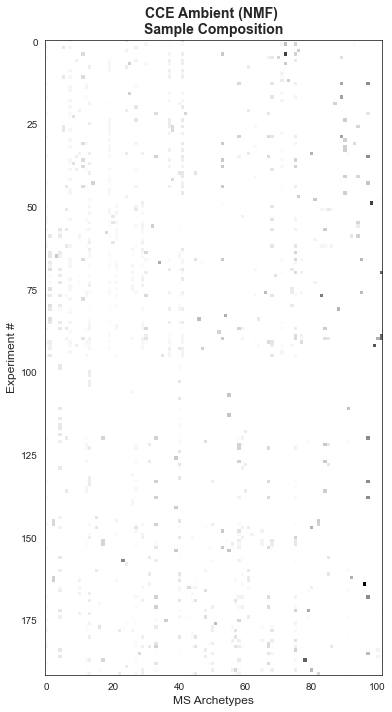

In [6]:
W_rt, H_rt, err_rt, df_H_rt = nmf_of_section(arr_rt, 102, 0, 192)
sample_composition(W_rt, 'CCE Ambient (NMF) \nSample Composition')

C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)


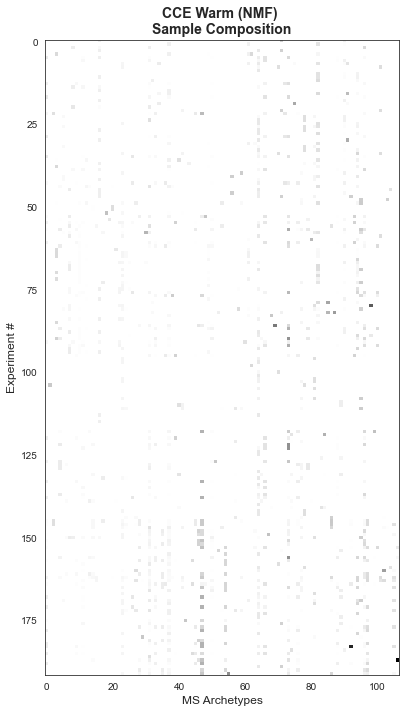

In [7]:
W_50, H_50, err_50, df_H_50 = nmf_of_section(arr_50, 107, 0, 192)
sample_composition(W_50, 'CCE Warm (NMF) \nSample Composition')

C:\Users\group\AppData\Roaming\Python\Python37\site-packages\sklearn\decomposition\_nmf.py:1091: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)


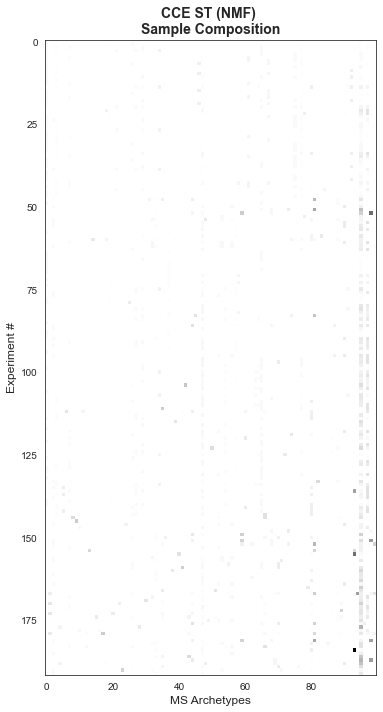

In [8]:
W_ST, H_ST, err_ST, df_H_ST = nmf_of_section(arr_ST, 100, 0, 192)
sample_composition(W_ST, 'CCE ST (NMF) \nSample Composition')

# Ambient

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:93: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


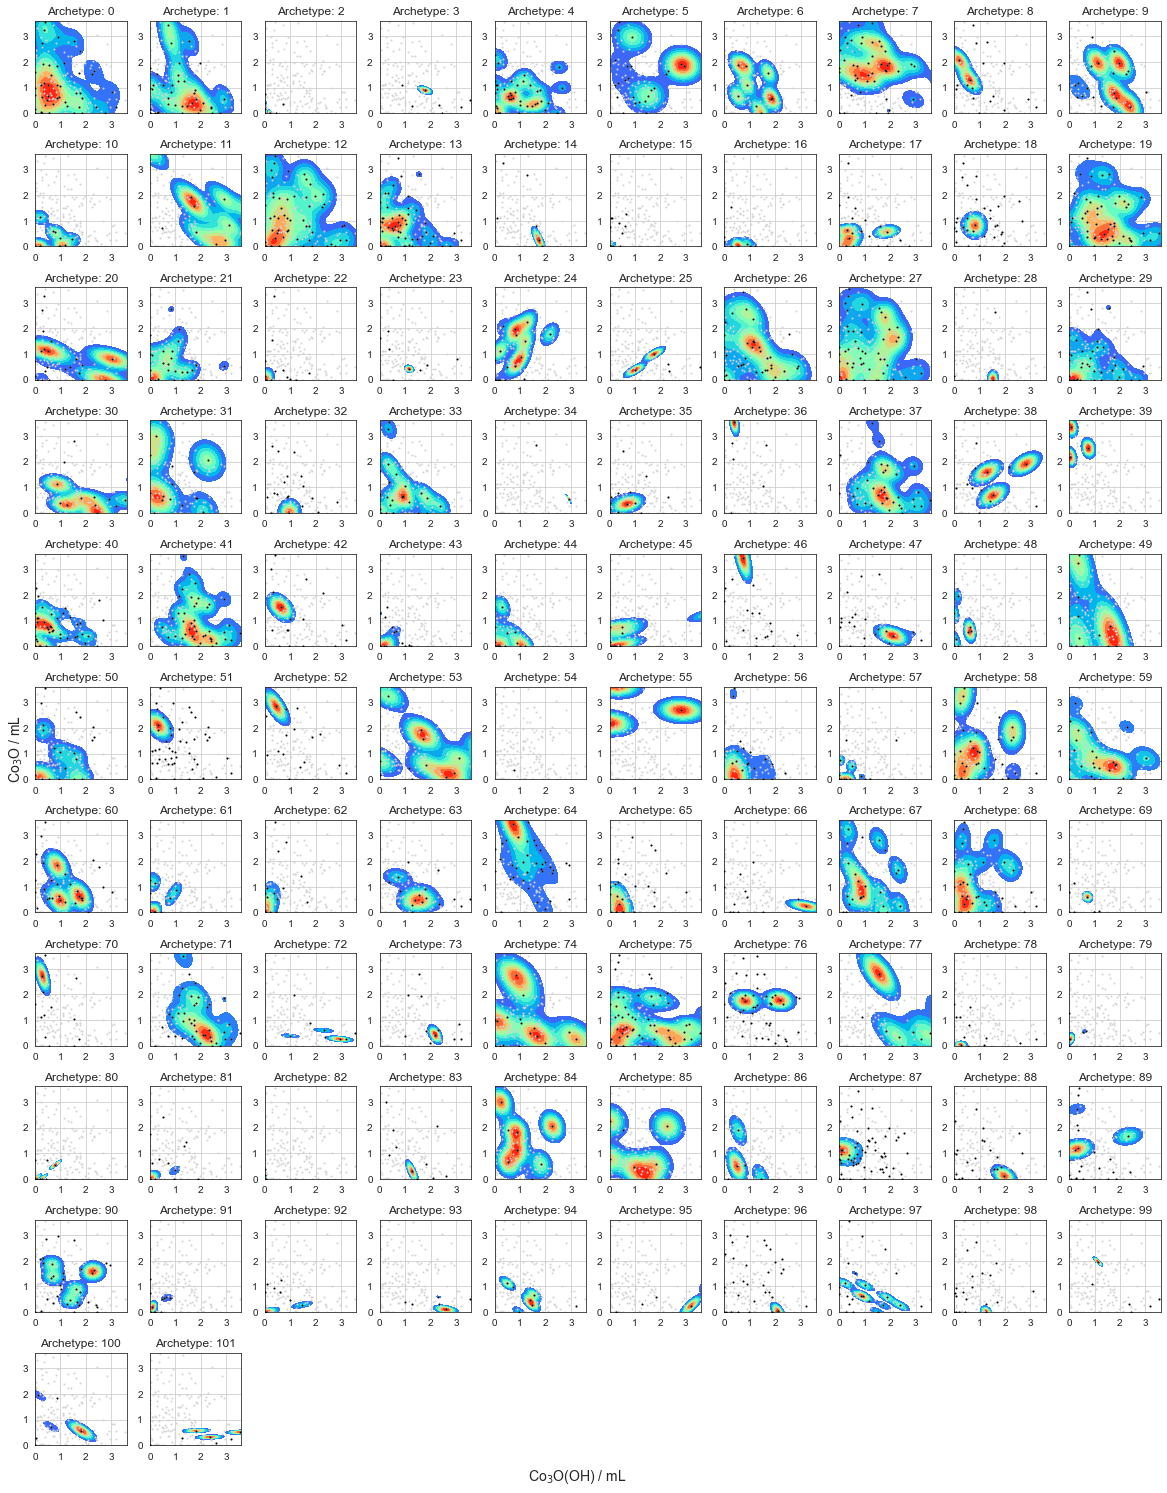

In [9]:
col_x = 'V_Co3O(OH)'
col_y = 'V_Co3O'

x = cce_v[col_x]
y = cce_v[col_y]

fig, ax = plt.subplots(11,10, figsize=(11*1.5,11*1.9))
fig.subplots_adjust(wspace=0.1,hspace=0.1)

axes = [
    (0,0), (0,1), (0,2), (0,3), (0,4), (0,5), (0,6), (0,7), (0,8), (0,9),
    (1,0), (1,1), (1,2), (1,3), (1,4), (1,5), (1,6), (1,7), (1,8), (1,9),
    (2,0), (2,1), (2,2), (2,3), (2,4), (2,5), (2,6), (2,7), (2,8), (2,9),
    (3,0), (3,1), (3,2), (3,3), (3,4), (3,5), (3,6), (3,7), (3,8), (3,9),
    (4,0), (4,1), (4,2), (4,3), (4,4), (4,5), (4,6), (4,7), (4,8), (4,9),
    (5,0), (5,1), (5,2), (5,3), (5,4), (5,5), (5,6), (5,7), (5,8), (5,9),
    (6,0), (6,1), (6,2), (6,3), (6,4), (6,5), (6,6), (6,7), (6,8), (6,9),
    (7,0), (7,1), (7,2), (7,3), (7,4), (7,5), (7,6), (7,7), (7,8), (7,9),
    (8,0), (8,1), (8,2), (8,3), (8,4), (8,5), (8,6), (8,7), (8,8), (8,9),
    (9,0), (9,1), (9,2), (9,3), (9,4), (9,5), (9,6), (9,7), (9,8), (9,9),
    (10,0), (10,1), 
]

no_axes = [
    (10,2), (10,3), (10,4), (10,5), (10,6), (10,7), (10,8), (10,9),
]

for axis in no_axes:
    ax[axis].axis('off')

n=0
for z, axis in zip(W_rt.T, axes):
    #print('Archetype #%s' % n)
    
    sub_df = pd.DataFrame(np.array([x,y,z]).T, columns=['col_x','col_y','res'])
    sub_df = sub_df[sub_df['res'] > 0.0]
    
    xi = sub_df['col_x']
    yi = sub_df['col_y']
    zi = sub_df['res']
    
    col_x_list, col_y_list, res_list = list(), list(), list()
    m_list = list()

    for index, row in sub_df.iterrows():
        m=0
        for _ in range(math.ceil(row['res']*100)):
            col_x_list.append(row['col_x'])
            col_y_list.append(row['col_y'])
            res_list.append(row['res'])
            m+=1
        m_list.append(m)
        
    #print(len(sub_df), m_list)

    
    new_sub_df = pd.DataFrame(
        np.array([col_x_list,col_y_list,res_list]).T,
        columns=['col_x','col_y','res']
    )
    
    ax[axis].grid(visible=True, which='major')
    ax[axis].set_xticks([0.0, 1.0, 2.0, 3.0])
    ax[axis].set_yticks([0.0, 1.0, 2.0, 3.0])
    #ax[axis].set_facecolor('k')
    
    try:
        g = sns.kdeplot(
            new_sub_df['col_x'], new_sub_df['col_y'], 
            ax=ax[axis], zorder=1,
            cmap='rainbow', shade=True, shade_lowest=False,
            #vmin=0, vmax=3, #cbar=True,  
        )

        g.set(xlabel=None)
        g.set(ylabel=None)
    except:
        pass
    ax[axis].scatter(xi, yi, s=1, c='k', zorder=3)
    ax[axis].scatter(x, y, s=1, c='lightgrey', zorder=2)


    ax[axis].set_xlim(0,3.6)
    ax[axis].set_ylim(0,3.6)
    ax[axis].set_title('Archetype: %s' % n)
    #plt.show()
    
    n+=1
    
fig.supxlabel(r'Co$_{3}$O(OH) / mL', fontsize=14)
fig.supylabel(r'Co$_{3}$O / mL', fontsize=14)
fig.tight_layout()
fig.show()

fig.savefig('output_vis//interpretation-CCE-5-wkde-ambient1.png')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:93: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


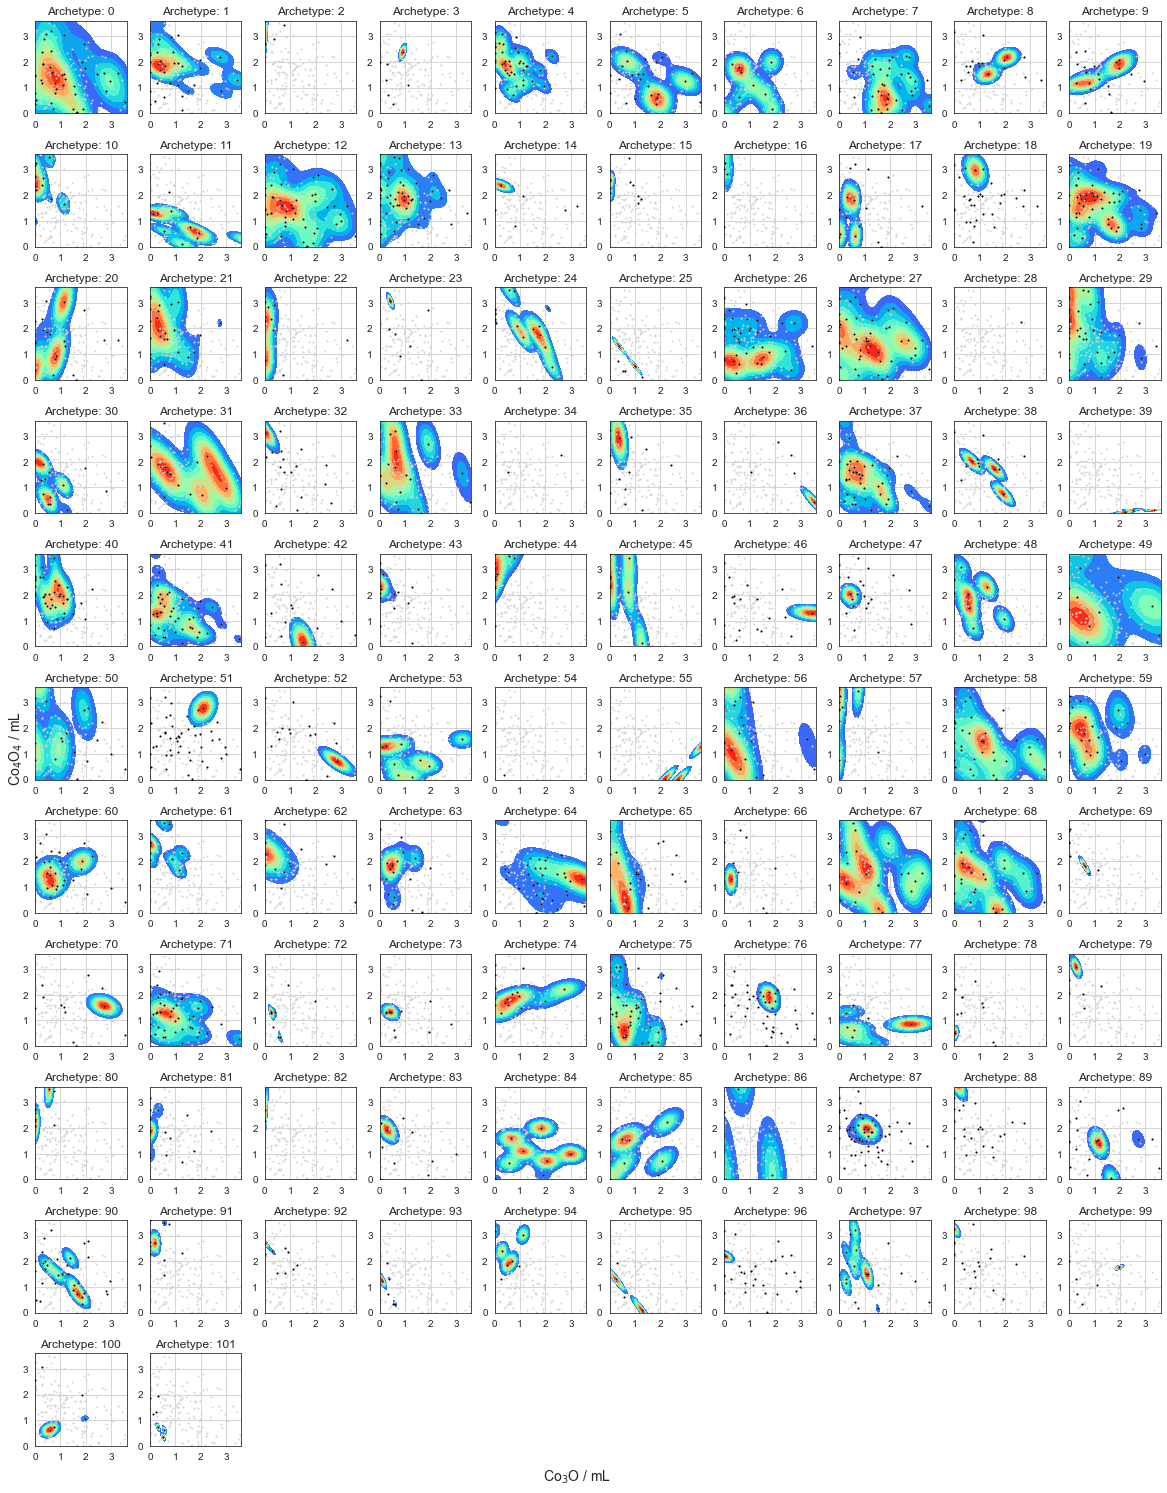

In [10]:
col_x = 'V_Co3O'
col_y = 'V_Co4O4'

x = cce_v[col_x]
y = cce_v[col_y]

fig, ax = plt.subplots(11,10, figsize=(11*1.5,11*1.9))
fig.subplots_adjust(wspace=0.1,hspace=0.1)

axes = [
    (0,0), (0,1), (0,2), (0,3), (0,4), (0,5), (0,6), (0,7), (0,8), (0,9),
    (1,0), (1,1), (1,2), (1,3), (1,4), (1,5), (1,6), (1,7), (1,8), (1,9),
    (2,0), (2,1), (2,2), (2,3), (2,4), (2,5), (2,6), (2,7), (2,8), (2,9),
    (3,0), (3,1), (3,2), (3,3), (3,4), (3,5), (3,6), (3,7), (3,8), (3,9),
    (4,0), (4,1), (4,2), (4,3), (4,4), (4,5), (4,6), (4,7), (4,8), (4,9),
    (5,0), (5,1), (5,2), (5,3), (5,4), (5,5), (5,6), (5,7), (5,8), (5,9),
    (6,0), (6,1), (6,2), (6,3), (6,4), (6,5), (6,6), (6,7), (6,8), (6,9),
    (7,0), (7,1), (7,2), (7,3), (7,4), (7,5), (7,6), (7,7), (7,8), (7,9),
    (8,0), (8,1), (8,2), (8,3), (8,4), (8,5), (8,6), (8,7), (8,8), (8,9),
    (9,0), (9,1), (9,2), (9,3), (9,4), (9,5), (9,6), (9,7), (9,8), (9,9),
    (10,0), (10,1), 
]

no_axes = [
    (10,2), (10,3), (10,4), (10,5), (10,6), (10,7), (10,8), (10,9),
]

for axis in no_axes:
    ax[axis].axis('off')

n=0
for z, axis in zip(W_rt.T, axes):
    #print('Archetype #%s' % n)
    
    sub_df = pd.DataFrame(np.array([x,y,z]).T, columns=['col_x','col_y','res'])
    sub_df = sub_df[sub_df['res'] > 0.0]
    
    xi = sub_df['col_x']
    yi = sub_df['col_y']
    zi = sub_df['res']
    
    col_x_list, col_y_list, res_list = list(), list(), list()
    m_list = list()

    for index, row in sub_df.iterrows():
        m=0
        for _ in range(math.ceil(row['res']*100)):
            col_x_list.append(row['col_x'])
            col_y_list.append(row['col_y'])
            res_list.append(row['res'])
            m+=1
        m_list.append(m)
        
    #print(len(sub_df), m_list)

    
    new_sub_df = pd.DataFrame(
        np.array([col_x_list,col_y_list,res_list]).T,
        columns=['col_x','col_y','res']
    )
    
    ax[axis].grid(visible=True, which='major')
    ax[axis].set_xticks([0.0, 1.0, 2.0, 3.0])
    ax[axis].set_yticks([0.0, 1.0, 2.0, 3.0])
    #ax[axis].set_facecolor('k')
    
    try:
        g = sns.kdeplot(
            new_sub_df['col_x'], new_sub_df['col_y'], 
            ax=ax[axis], zorder=1,
            cmap='rainbow', shade=True, shade_lowest=False,
            #vmin=0, vmax=3, #cbar=True,  
        )

        g.set(xlabel=None)
        g.set(ylabel=None)
    except:
        pass
    ax[axis].scatter(xi, yi, s=1, c='k', zorder=3)
    ax[axis].scatter(x, y, s=1, c='lightgrey', zorder=2)


    ax[axis].set_xlim(0,3.6)
    ax[axis].set_ylim(0,3.6)
    ax[axis].set_title('Archetype: %s' % n)
    #plt.show()
    
    n+=1
    
fig.supxlabel(r'Co$_{3}$O / mL', fontsize=14)
fig.supylabel(r'Co$_{4}$O$_{4}$ / mL', fontsize=14)
fig.tight_layout()
fig.show()

fig.savefig('output_vis//interpretation-CCE-5-wkde-ambient2.png')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:93: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


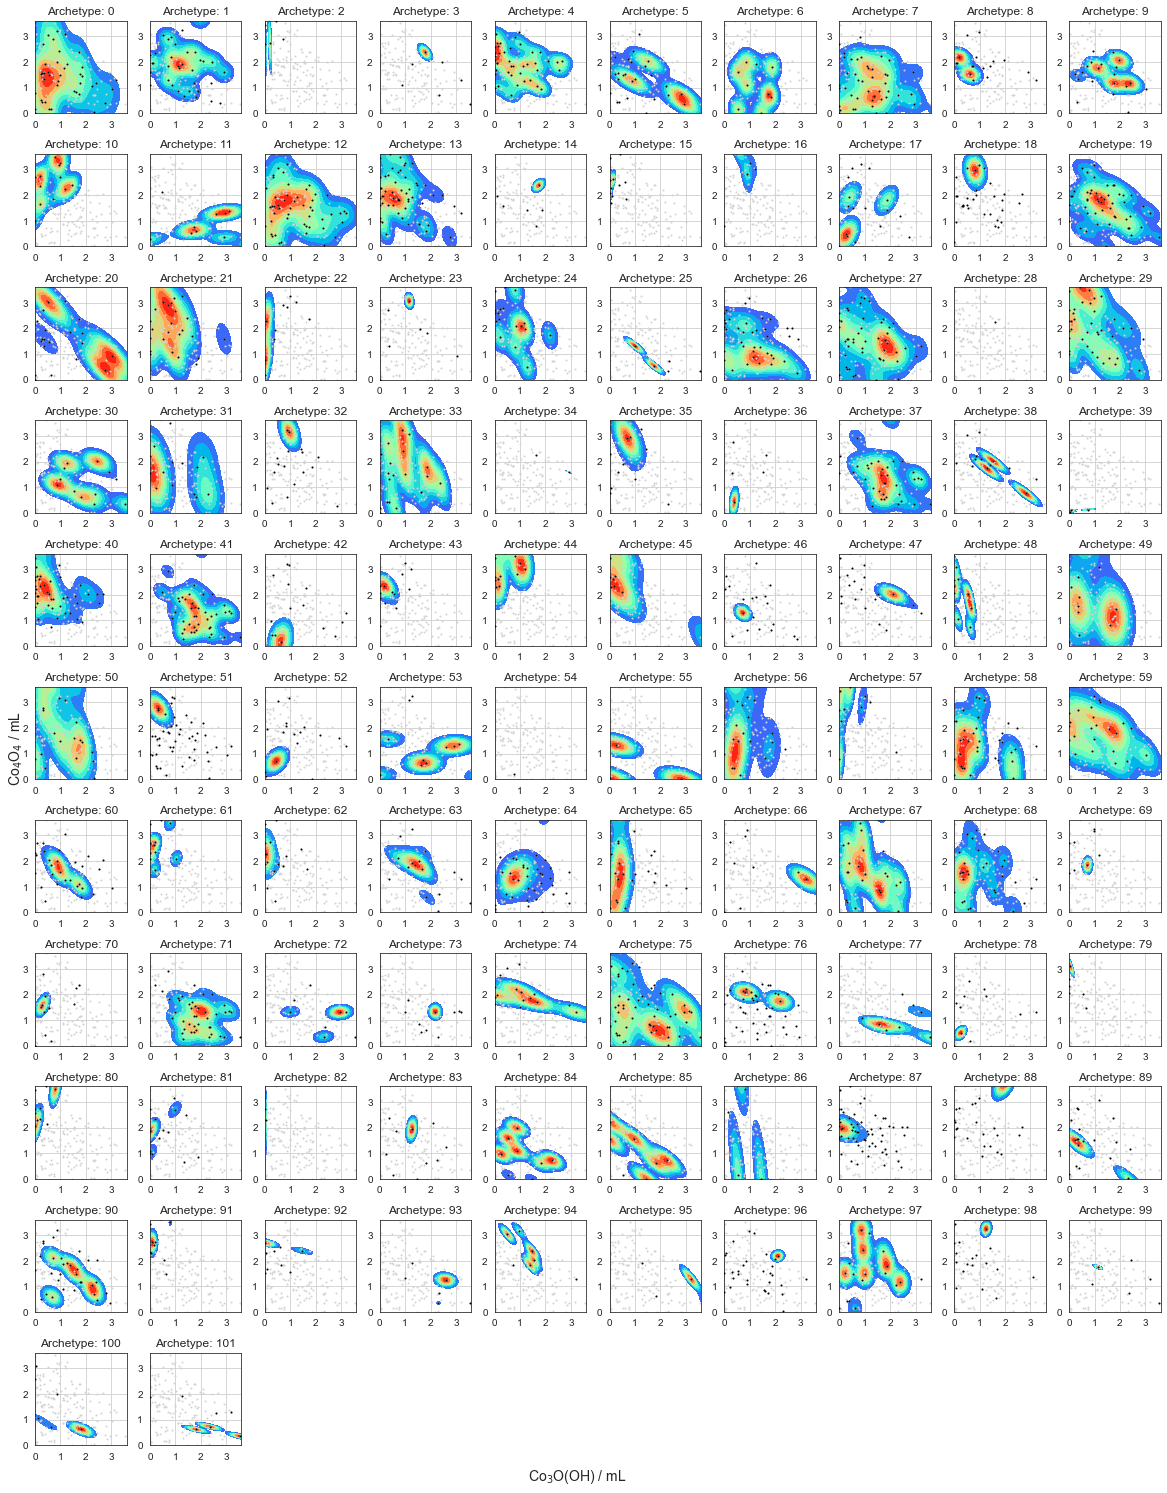

In [11]:
col_x = 'V_Co3O(OH)'
col_y = 'V_Co4O4'

x = cce_v[col_x]
y = cce_v[col_y]

fig, ax = plt.subplots(11,10, figsize=(11*1.5,11*1.9))
fig.subplots_adjust(wspace=0.1,hspace=0.1)

axes = [
    (0,0), (0,1), (0,2), (0,3), (0,4), (0,5), (0,6), (0,7), (0,8), (0,9),
    (1,0), (1,1), (1,2), (1,3), (1,4), (1,5), (1,6), (1,7), (1,8), (1,9),
    (2,0), (2,1), (2,2), (2,3), (2,4), (2,5), (2,6), (2,7), (2,8), (2,9),
    (3,0), (3,1), (3,2), (3,3), (3,4), (3,5), (3,6), (3,7), (3,8), (3,9),
    (4,0), (4,1), (4,2), (4,3), (4,4), (4,5), (4,6), (4,7), (4,8), (4,9),
    (5,0), (5,1), (5,2), (5,3), (5,4), (5,5), (5,6), (5,7), (5,8), (5,9),
    (6,0), (6,1), (6,2), (6,3), (6,4), (6,5), (6,6), (6,7), (6,8), (6,9),
    (7,0), (7,1), (7,2), (7,3), (7,4), (7,5), (7,6), (7,7), (7,8), (7,9),
    (8,0), (8,1), (8,2), (8,3), (8,4), (8,5), (8,6), (8,7), (8,8), (8,9),
    (9,0), (9,1), (9,2), (9,3), (9,4), (9,5), (9,6), (9,7), (9,8), (9,9),
    (10,0), (10,1), 
]

no_axes = [
    (10,2), (10,3), (10,4), (10,5), (10,6), (10,7), (10,8), (10,9),
]

for axis in no_axes:
    ax[axis].axis('off')

n=0
for z, axis in zip(W_rt.T, axes):
    #print('Archetype #%s' % n)
    
    sub_df = pd.DataFrame(np.array([x,y,z]).T, columns=['col_x','col_y','res'])
    sub_df = sub_df[sub_df['res'] > 0.0]
    
    xi = sub_df['col_x']
    yi = sub_df['col_y']
    zi = sub_df['res']
    
    col_x_list, col_y_list, res_list = list(), list(), list()
    m_list = list()

    for index, row in sub_df.iterrows():
        m=0
        for _ in range(math.ceil(row['res']*100)):
            col_x_list.append(row['col_x'])
            col_y_list.append(row['col_y'])
            res_list.append(row['res'])
            m+=1
        m_list.append(m)
        
    #print(len(sub_df), m_list)

    
    new_sub_df = pd.DataFrame(
        np.array([col_x_list,col_y_list,res_list]).T,
        columns=['col_x','col_y','res']
    )
    
    ax[axis].grid(visible=True, which='major')
    ax[axis].set_xticks([0.0, 1.0, 2.0, 3.0])
    ax[axis].set_yticks([0.0, 1.0, 2.0, 3.0])
    #ax[axis].set_facecolor('k')
    
    try:
        g = sns.kdeplot(
            new_sub_df['col_x'], new_sub_df['col_y'], 
            ax=ax[axis], zorder=1,
            cmap='rainbow', shade=True, shade_lowest=False,
            #vmin=0, vmax=3, #cbar=True,  
        )

        g.set(xlabel=None)
        g.set(ylabel=None)
    except:
        pass
    ax[axis].scatter(xi, yi, s=1, c='k', zorder=3)
    ax[axis].scatter(x, y, s=1, c='lightgrey', zorder=2)


    ax[axis].set_xlim(0,3.6)
    ax[axis].set_ylim(0,3.6)
    ax[axis].set_title('Archetype: %s' % n)
    #plt.show()
    
    n+=1
    
fig.supxlabel(r'Co$_{3}$O(OH) / mL', fontsize=14)
fig.supylabel(r'Co$_{4}$O$_{4}$ / mL', fontsize=14)
fig.tight_layout()
fig.show()

fig.savefig('output_vis//interpretation-CCE-5-wkde-ambient3.png')

# Warm

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:93: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


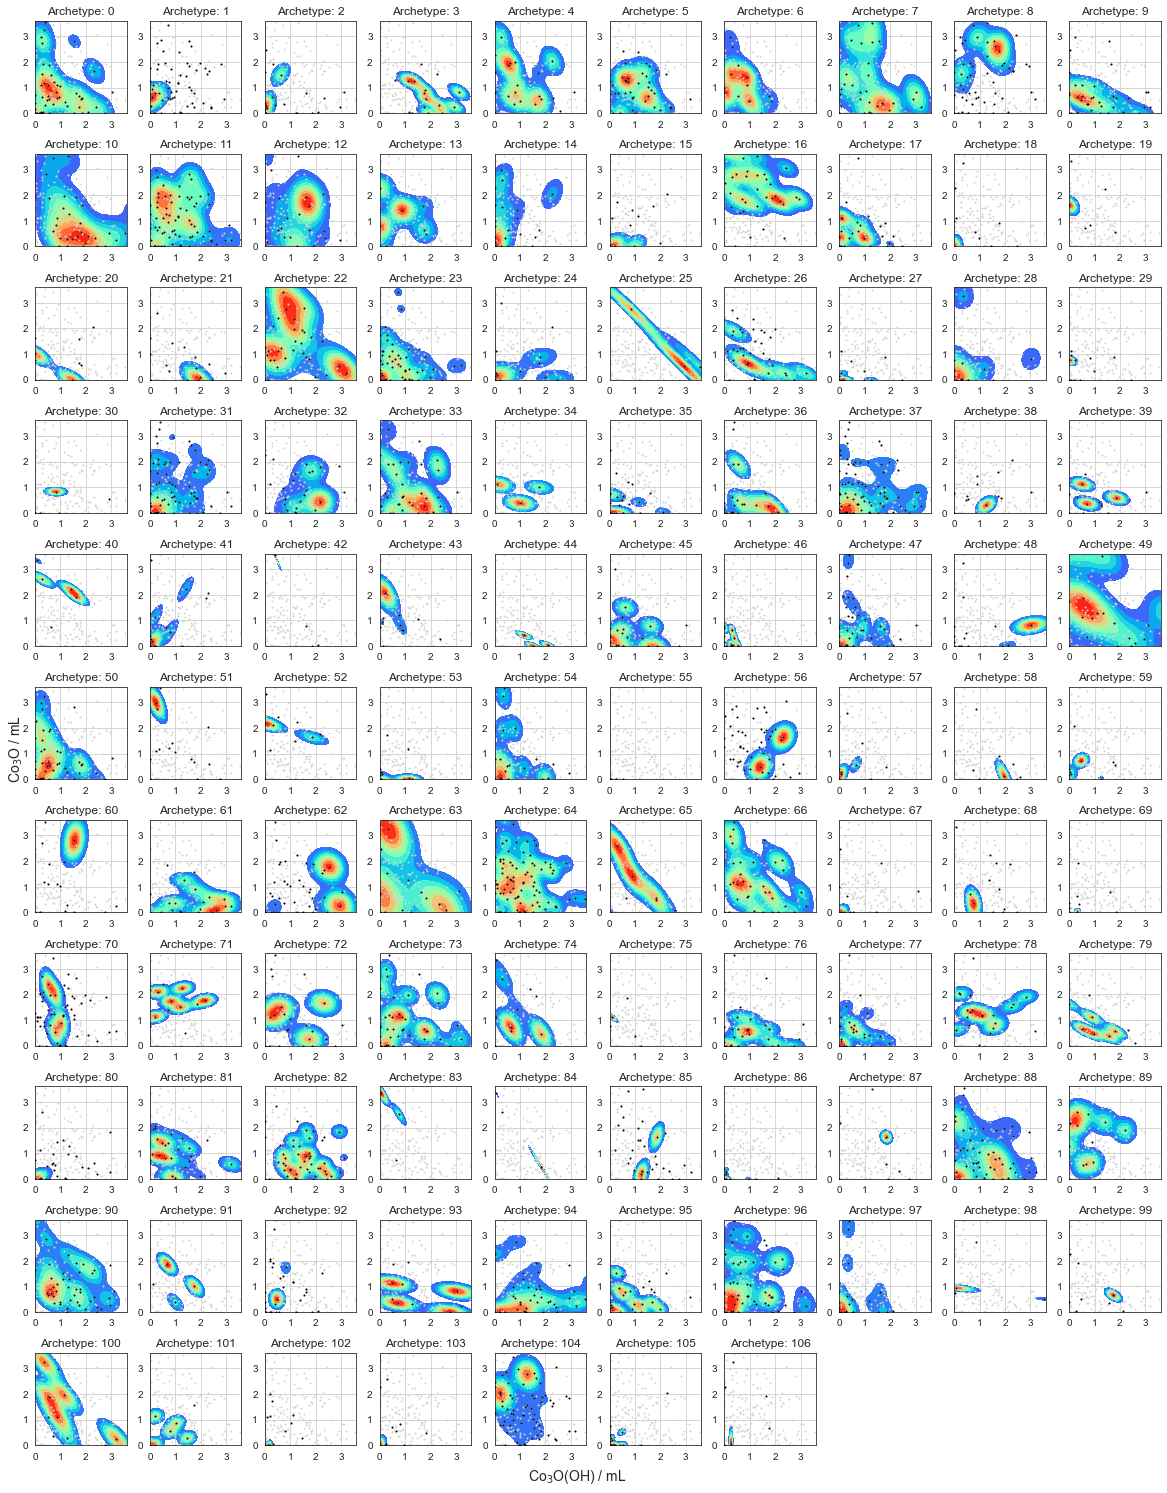

In [12]:
col_x = 'V_Co3O(OH)'
col_y = 'V_Co3O'

x = cce_v[col_x]
y = cce_v[col_y]

fig, ax = plt.subplots(11,10, figsize=(11*1.5,11*1.9))
fig.subplots_adjust(wspace=0.1,hspace=0.1)

axes = [
    (0,0), (0,1), (0,2), (0,3), (0,4), (0,5), (0,6), (0,7), (0,8), (0,9),
    (1,0), (1,1), (1,2), (1,3), (1,4), (1,5), (1,6), (1,7), (1,8), (1,9),
    (2,0), (2,1), (2,2), (2,3), (2,4), (2,5), (2,6), (2,7), (2,8), (2,9),
    (3,0), (3,1), (3,2), (3,3), (3,4), (3,5), (3,6), (3,7), (3,8), (3,9),
    (4,0), (4,1), (4,2), (4,3), (4,4), (4,5), (4,6), (4,7), (4,8), (4,9),
    (5,0), (5,1), (5,2), (5,3), (5,4), (5,5), (5,6), (5,7), (5,8), (5,9),
    (6,0), (6,1), (6,2), (6,3), (6,4), (6,5), (6,6), (6,7), (6,8), (6,9),
    (7,0), (7,1), (7,2), (7,3), (7,4), (7,5), (7,6), (7,7), (7,8), (7,9),
    (8,0), (8,1), (8,2), (8,3), (8,4), (8,5), (8,6), (8,7), (8,8), (8,9),
    (9,0), (9,1), (9,2), (9,3), (9,4), (9,5), (9,6), (9,7), (9,8), (9,9),
    (10,0), (10,1), (10,2), (10,3), (10,4), (10,5), (10,6), 
]

no_axes = [
    (10,7), (10,8), (10,9),
]

for axis in no_axes:
    ax[axis].axis('off')

n=0
for z, axis in zip(W_50.T, axes):
    #print('Archetype #%s' % n)
    
    sub_df = pd.DataFrame(np.array([x,y,z]).T, columns=['col_x','col_y','res'])
    sub_df = sub_df[sub_df['res'] > 0.0]
    
    xi = sub_df['col_x']
    yi = sub_df['col_y']
    zi = sub_df['res']
    
    col_x_list, col_y_list, res_list = list(), list(), list()
    m_list = list()

    for index, row in sub_df.iterrows():
        m=0
        for _ in range(math.ceil(row['res']*100)):
            col_x_list.append(row['col_x'])
            col_y_list.append(row['col_y'])
            res_list.append(row['res'])
            m+=1
        m_list.append(m)
        
    #print(len(sub_df), m_list)

    
    new_sub_df = pd.DataFrame(
        np.array([col_x_list,col_y_list,res_list]).T,
        columns=['col_x','col_y','res']
    )
    
    ax[axis].grid(visible=True, which='major')
    ax[axis].set_xticks([0.0, 1.0, 2.0, 3.0])
    ax[axis].set_yticks([0.0, 1.0, 2.0, 3.0])
    #ax[axis].set_facecolor('k')
    
    try:
        g = sns.kdeplot(
            new_sub_df['col_x'], new_sub_df['col_y'], 
            ax=ax[axis], zorder=1,
            cmap='rainbow', shade=True, shade_lowest=False,
            #vmin=0, vmax=3, #cbar=True,  
        )

        g.set(xlabel=None)
        g.set(ylabel=None)
    except:
        pass
    ax[axis].scatter(xi, yi, s=1, c='k', zorder=3)
    ax[axis].scatter(x, y, s=1, c='lightgrey', zorder=2)


    ax[axis].set_xlim(0,3.6)
    ax[axis].set_ylim(0,3.6)
    ax[axis].set_title('Archetype: %s' % n)
    #plt.show()
    
    n+=1
    
fig.supxlabel(r'Co$_{3}$O(OH) / mL', fontsize=14)
fig.supylabel(r'Co$_{3}$O / mL', fontsize=14)
fig.tight_layout()
fig.show()

fig.savefig('output_vis//interpretation-CCE-5-wkde-warm1.png')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:93: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


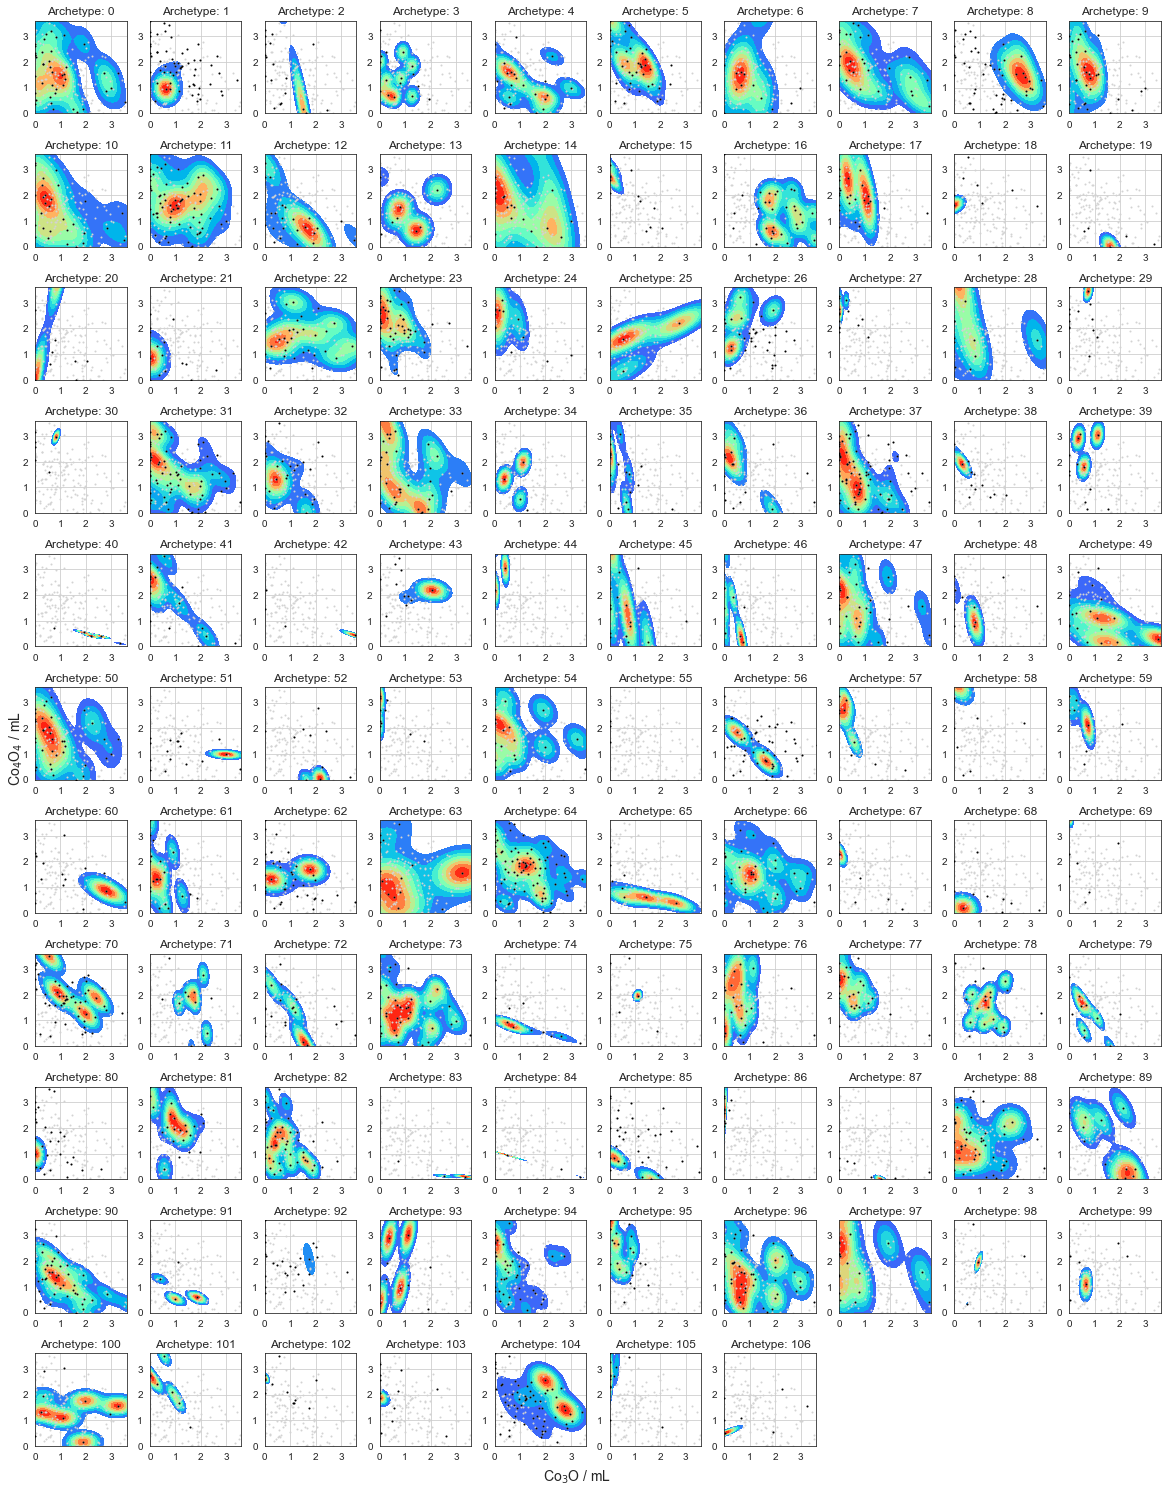

In [13]:
col_x = 'V_Co3O'
col_y = 'V_Co4O4'

x = cce_v[col_x]
y = cce_v[col_y]

fig, ax = plt.subplots(11,10, figsize=(11*1.5,11*1.9))
fig.subplots_adjust(wspace=0.1,hspace=0.1)

axes = [
    (0,0), (0,1), (0,2), (0,3), (0,4), (0,5), (0,6), (0,7), (0,8), (0,9),
    (1,0), (1,1), (1,2), (1,3), (1,4), (1,5), (1,6), (1,7), (1,8), (1,9),
    (2,0), (2,1), (2,2), (2,3), (2,4), (2,5), (2,6), (2,7), (2,8), (2,9),
    (3,0), (3,1), (3,2), (3,3), (3,4), (3,5), (3,6), (3,7), (3,8), (3,9),
    (4,0), (4,1), (4,2), (4,3), (4,4), (4,5), (4,6), (4,7), (4,8), (4,9),
    (5,0), (5,1), (5,2), (5,3), (5,4), (5,5), (5,6), (5,7), (5,8), (5,9),
    (6,0), (6,1), (6,2), (6,3), (6,4), (6,5), (6,6), (6,7), (6,8), (6,9),
    (7,0), (7,1), (7,2), (7,3), (7,4), (7,5), (7,6), (7,7), (7,8), (7,9),
    (8,0), (8,1), (8,2), (8,3), (8,4), (8,5), (8,6), (8,7), (8,8), (8,9),
    (9,0), (9,1), (9,2), (9,3), (9,4), (9,5), (9,6), (9,7), (9,8), (9,9),
    (10,0), (10,1), (10,2), (10,3), (10,4), (10,5), (10,6), 
]

no_axes = [
    (10,7), (10,8), (10,9),
]

for axis in no_axes:
    ax[axis].axis('off')

n=0
for z, axis in zip(W_50.T, axes):
    #print('Archetype #%s' % n)
    
    sub_df = pd.DataFrame(np.array([x,y,z]).T, columns=['col_x','col_y','res'])
    sub_df = sub_df[sub_df['res'] > 0.0]
    
    xi = sub_df['col_x']
    yi = sub_df['col_y']
    zi = sub_df['res']
    
    col_x_list, col_y_list, res_list = list(), list(), list()
    m_list = list()

    for index, row in sub_df.iterrows():
        m=0
        for _ in range(math.ceil(row['res']*100)):
            col_x_list.append(row['col_x'])
            col_y_list.append(row['col_y'])
            res_list.append(row['res'])
            m+=1
        m_list.append(m)
        
    #print(len(sub_df), m_list)

    
    new_sub_df = pd.DataFrame(
        np.array([col_x_list,col_y_list,res_list]).T,
        columns=['col_x','col_y','res']
    )
    
    ax[axis].grid(visible=True, which='major')
    ax[axis].set_xticks([0.0, 1.0, 2.0, 3.0])
    ax[axis].set_yticks([0.0, 1.0, 2.0, 3.0])
    #ax[axis].set_facecolor('k')
    
    try:
        g = sns.kdeplot(
            new_sub_df['col_x'], new_sub_df['col_y'], 
            ax=ax[axis], zorder=1,
            cmap='rainbow', shade=True, shade_lowest=False,
            #vmin=0, vmax=3, #cbar=True,  
        )

        g.set(xlabel=None)
        g.set(ylabel=None)
    except:
        pass
    ax[axis].scatter(xi, yi, s=1, c='k', zorder=3)
    ax[axis].scatter(x, y, s=1, c='lightgrey', zorder=2)


    ax[axis].set_xlim(0,3.6)
    ax[axis].set_ylim(0,3.6)
    ax[axis].set_title('Archetype: %s' % n)
    #plt.show()
    
    n+=1
    
fig.supxlabel(r'Co$_{3}$O / mL', fontsize=14)
fig.supylabel(r'Co$_{4}$O$_{4}$ / mL', fontsize=14)
fig.tight_layout()
fig.show()

fig.savefig('output_vis//interpretation-CCE-5-wkde-warm2.png')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:93: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


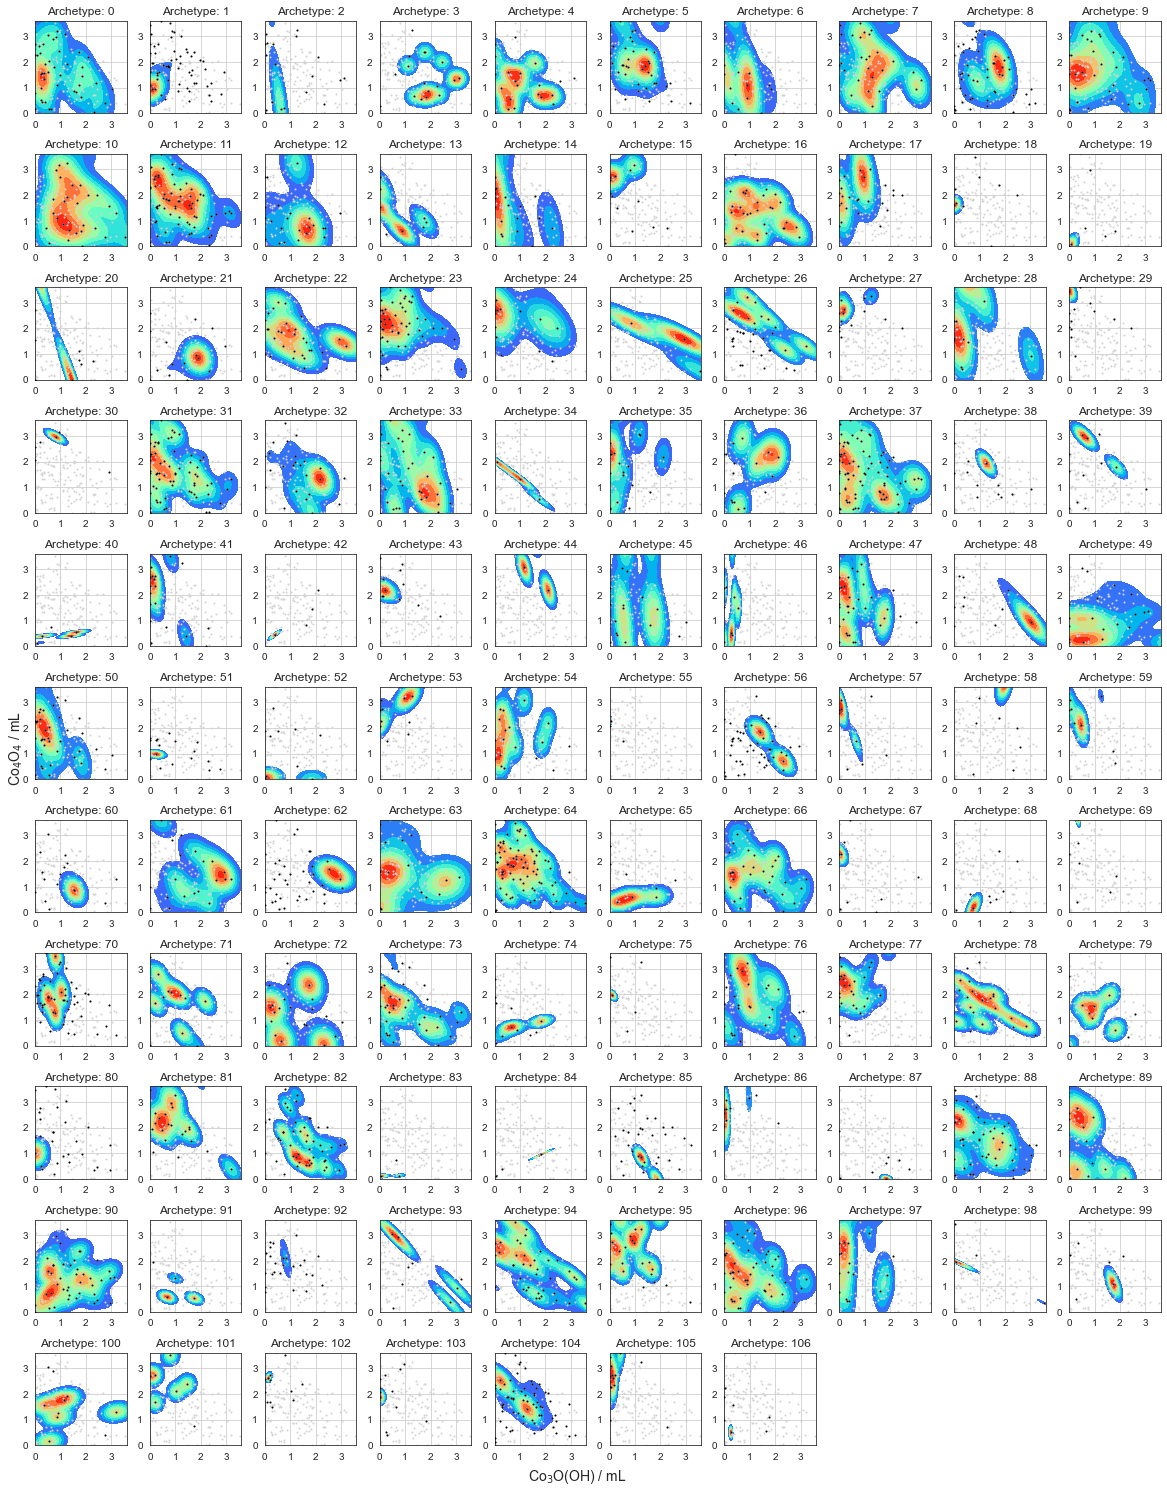

In [14]:
col_x = 'V_Co3O(OH)'
col_y = 'V_Co4O4'

x = cce_v[col_x]
y = cce_v[col_y]

fig, ax = plt.subplots(11,10, figsize=(11*1.5,11*1.9))
fig.subplots_adjust(wspace=0.1,hspace=0.1)

axes = [
    (0,0), (0,1), (0,2), (0,3), (0,4), (0,5), (0,6), (0,7), (0,8), (0,9),
    (1,0), (1,1), (1,2), (1,3), (1,4), (1,5), (1,6), (1,7), (1,8), (1,9),
    (2,0), (2,1), (2,2), (2,3), (2,4), (2,5), (2,6), (2,7), (2,8), (2,9),
    (3,0), (3,1), (3,2), (3,3), (3,4), (3,5), (3,6), (3,7), (3,8), (3,9),
    (4,0), (4,1), (4,2), (4,3), (4,4), (4,5), (4,6), (4,7), (4,8), (4,9),
    (5,0), (5,1), (5,2), (5,3), (5,4), (5,5), (5,6), (5,7), (5,8), (5,9),
    (6,0), (6,1), (6,2), (6,3), (6,4), (6,5), (6,6), (6,7), (6,8), (6,9),
    (7,0), (7,1), (7,2), (7,3), (7,4), (7,5), (7,6), (7,7), (7,8), (7,9),
    (8,0), (8,1), (8,2), (8,3), (8,4), (8,5), (8,6), (8,7), (8,8), (8,9),
    (9,0), (9,1), (9,2), (9,3), (9,4), (9,5), (9,6), (9,7), (9,8), (9,9),
    (10,0), (10,1), (10,2), (10,3), (10,4), (10,5), (10,6), 
]

no_axes = [
    (10,7), (10,8), (10,9),
]

for axis in no_axes:
    ax[axis].axis('off')

n=0
for z, axis in zip(W_50.T, axes):
    #print('Archetype #%s' % n)
    
    sub_df = pd.DataFrame(np.array([x,y,z]).T, columns=['col_x','col_y','res'])
    sub_df = sub_df[sub_df['res'] > 0.0]
    
    xi = sub_df['col_x']
    yi = sub_df['col_y']
    zi = sub_df['res']
    
    col_x_list, col_y_list, res_list = list(), list(), list()
    m_list = list()

    for index, row in sub_df.iterrows():
        m=0
        for _ in range(math.ceil(row['res']*100)):
            col_x_list.append(row['col_x'])
            col_y_list.append(row['col_y'])
            res_list.append(row['res'])
            m+=1
        m_list.append(m)
        
    #print(len(sub_df), m_list)

    
    new_sub_df = pd.DataFrame(
        np.array([col_x_list,col_y_list,res_list]).T,
        columns=['col_x','col_y','res']
    )
    
    ax[axis].grid(visible=True, which='major')
    ax[axis].set_xticks([0.0, 1.0, 2.0, 3.0])
    ax[axis].set_yticks([0.0, 1.0, 2.0, 3.0])
    #ax[axis].set_facecolor('k')
    
    try:
        g = sns.kdeplot(
            new_sub_df['col_x'], new_sub_df['col_y'], 
            ax=ax[axis], zorder=1,
            cmap='rainbow', shade=True, shade_lowest=False,
            #vmin=0, vmax=3, #cbar=True,  
        )

        g.set(xlabel=None)
        g.set(ylabel=None)
    except:
        pass
    ax[axis].scatter(xi, yi, s=1, c='k', zorder=3)
    ax[axis].scatter(x, y, s=1, c='lightgrey', zorder=2)


    ax[axis].set_xlim(0,3.6)
    ax[axis].set_ylim(0,3.6)
    ax[axis].set_title('Archetype: %s' % n)
    #plt.show()
    
    n+=1
    
fig.supxlabel(r'Co$_{3}$O(OH) / mL', fontsize=14)
fig.supylabel(r'Co$_{4}$O$_{4}$ / mL', fontsize=14)
fig.tight_layout()
fig.show()

fig.savefig('output_vis//interpretation-CCE-5-wkde-warm3.png')

# Solvothermal

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:93: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


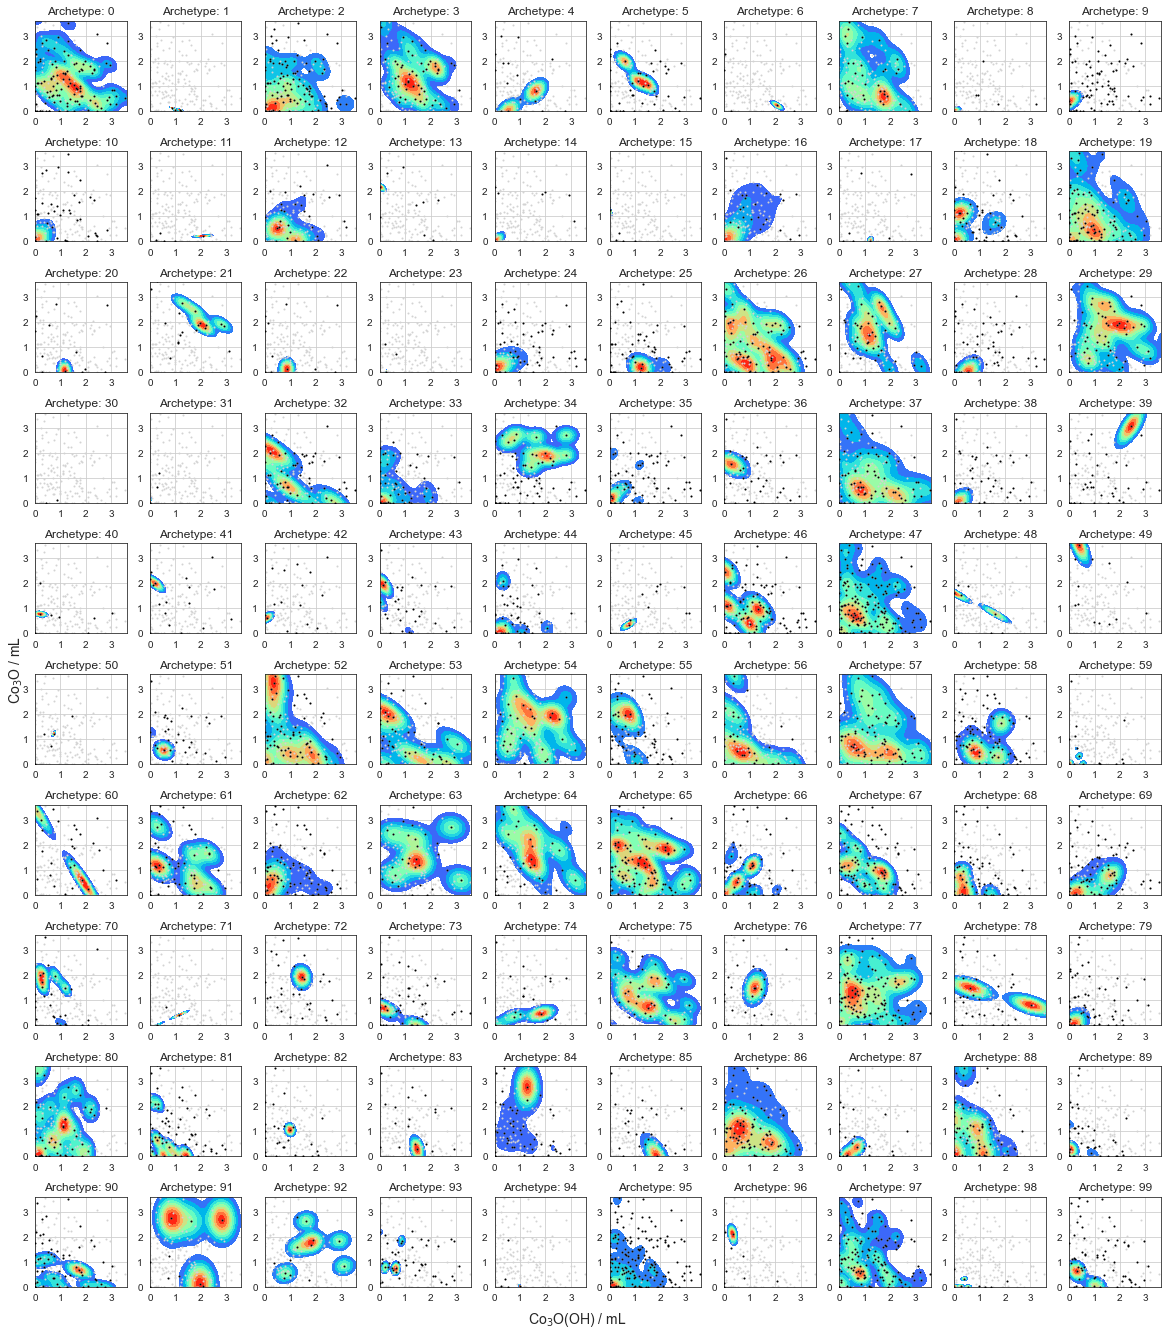

In [15]:
col_x = 'V_Co3O(OH)'
col_y = 'V_Co3O'

x = cce_v[col_x]
y = cce_v[col_y]

fig, ax = plt.subplots(10,10, figsize=(11*1.5,11*1.7))
fig.subplots_adjust(wspace=0.1,hspace=0.1)

axes = [
    (0,0), (0,1), (0,2), (0,3), (0,4), (0,5), (0,6), (0,7), (0,8), (0,9),
    (1,0), (1,1), (1,2), (1,3), (1,4), (1,5), (1,6), (1,7), (1,8), (1,9),
    (2,0), (2,1), (2,2), (2,3), (2,4), (2,5), (2,6), (2,7), (2,8), (2,9),
    (3,0), (3,1), (3,2), (3,3), (3,4), (3,5), (3,6), (3,7), (3,8), (3,9),
    (4,0), (4,1), (4,2), (4,3), (4,4), (4,5), (4,6), (4,7), (4,8), (4,9),
    (5,0), (5,1), (5,2), (5,3), (5,4), (5,5), (5,6), (5,7), (5,8), (5,9),
    (6,0), (6,1), (6,2), (6,3), (6,4), (6,5), (6,6), (6,7), (6,8), (6,9),
    (7,0), (7,1), (7,2), (7,3), (7,4), (7,5), (7,6), (7,7), (7,8), (7,9),
    (8,0), (8,1), (8,2), (8,3), (8,4), (8,5), (8,6), (8,7), (8,8), (8,9),
    (9,0), (9,1), (9,2), (9,3), (9,4), (9,5), (9,6), (9,7), (9,8), (9,9),
    
]

no_axes = [
#    (10,0), (10,1), (10,2), (10,3), (10,4), (10,5), (10,6), (10,7), (10,8), (10,9),
]

for axis in no_axes:
    ax[axis].axis('off')

n=0
for z, axis in zip(W_ST.T, axes):
    #print('Archetype #%s' % n)
    
    sub_df = pd.DataFrame(np.array([x,y,z]).T, columns=['col_x','col_y','res'])
    sub_df = sub_df[sub_df['res'] > 0.0]
    
    xi = sub_df['col_x']
    yi = sub_df['col_y']
    zi = sub_df['res']
    
    col_x_list, col_y_list, res_list = list(), list(), list()
    m_list = list()

    for index, row in sub_df.iterrows():
        m=0
        for _ in range(math.ceil(row['res']*100)):
            col_x_list.append(row['col_x'])
            col_y_list.append(row['col_y'])
            res_list.append(row['res'])
            m+=1
        m_list.append(m)
        
    #print(len(sub_df), m_list)

    
    new_sub_df = pd.DataFrame(
        np.array([col_x_list,col_y_list,res_list]).T,
        columns=['col_x','col_y','res']
    )
    
    ax[axis].grid(visible=True, which='major')
    ax[axis].set_xticks([0.0, 1.0, 2.0, 3.0])
    ax[axis].set_yticks([0.0, 1.0, 2.0, 3.0])
    #ax[axis].set_facecolor('k')
    
    try:
        g = sns.kdeplot(
            new_sub_df['col_x'], new_sub_df['col_y'], 
            ax=ax[axis], zorder=1,
            cmap='rainbow', shade=True, shade_lowest=False,
            #vmin=0, vmax=3, #cbar=True,  
        )

        g.set(xlabel=None)
        g.set(ylabel=None)
    except:
        pass
    ax[axis].scatter(xi, yi, s=1, c='k', zorder=3)
    ax[axis].scatter(x, y, s=1, c='lightgrey', zorder=2)


    ax[axis].set_xlim(0,3.6)
    ax[axis].set_ylim(0,3.6)
    ax[axis].set_title('Archetype: %s' % n)
    #plt.show()
    
    n+=1
    
fig.supxlabel(r'Co$_{3}$O(OH) / mL', fontsize=14)
fig.supylabel(r'Co$_{3}$O / mL', fontsize=14)
fig.tight_layout()
fig.show()

fig.savefig('output_vis//interpretation-CCE-5-wkde-solvothermal1.png')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:93: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


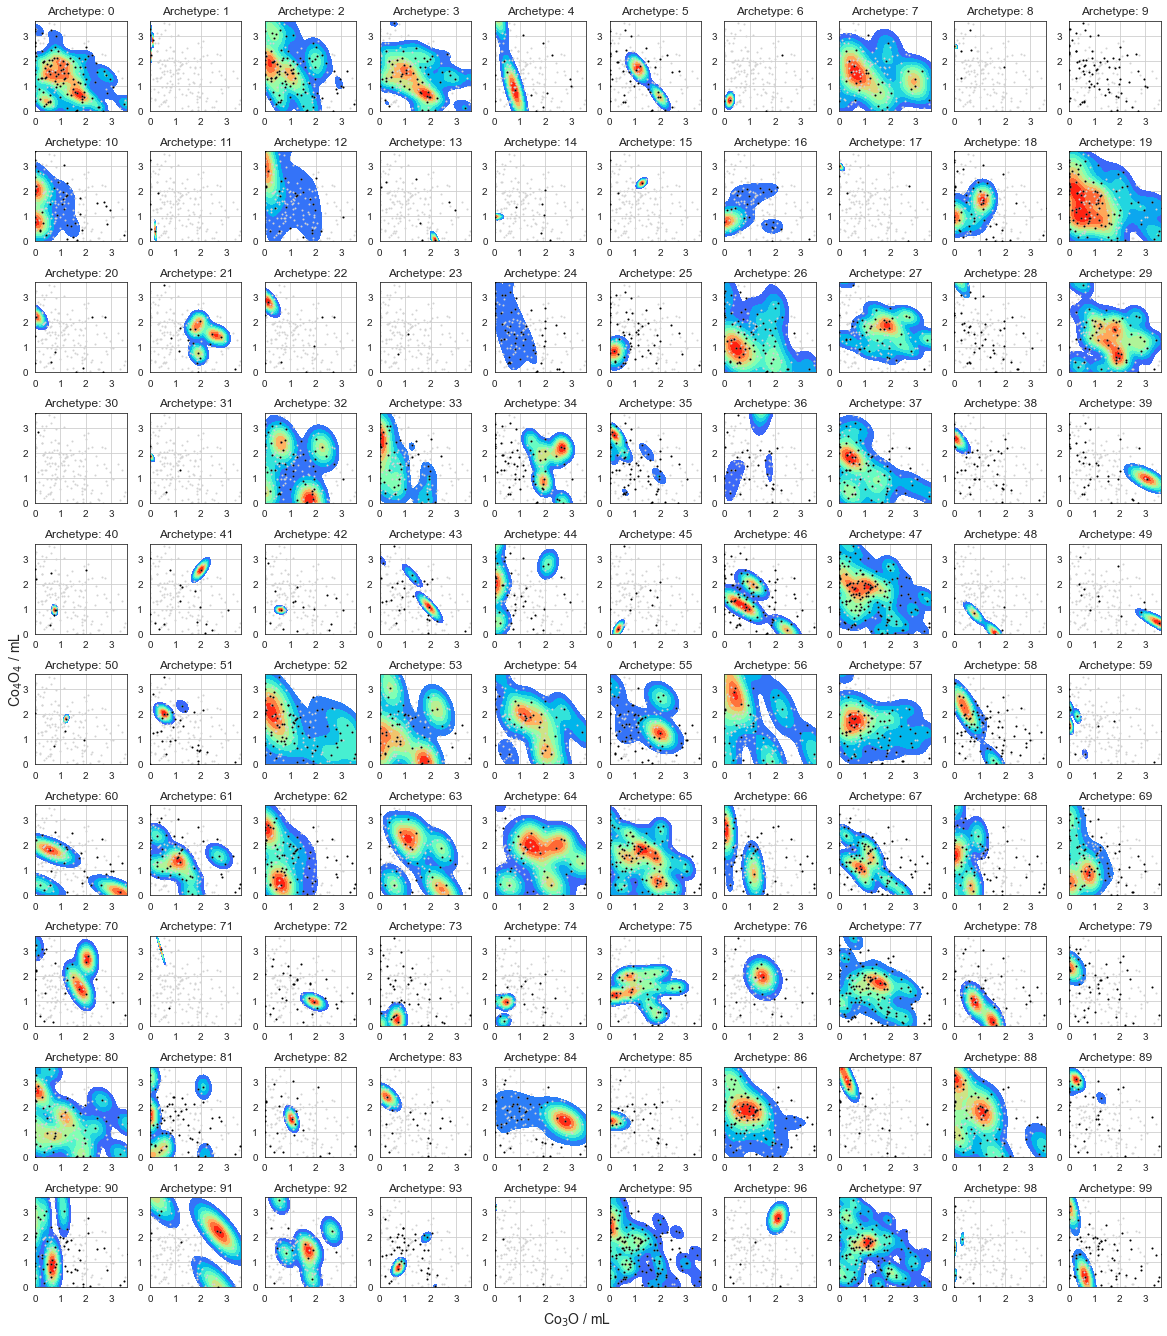

In [16]:
col_x = 'V_Co3O'
col_y = 'V_Co4O4'

x = cce_v[col_x]
y = cce_v[col_y]

fig, ax = plt.subplots(10,10, figsize=(11*1.5,11*1.7))
fig.subplots_adjust(wspace=0.1,hspace=0.1)

axes = [
    (0,0), (0,1), (0,2), (0,3), (0,4), (0,5), (0,6), (0,7), (0,8), (0,9),
    (1,0), (1,1), (1,2), (1,3), (1,4), (1,5), (1,6), (1,7), (1,8), (1,9),
    (2,0), (2,1), (2,2), (2,3), (2,4), (2,5), (2,6), (2,7), (2,8), (2,9),
    (3,0), (3,1), (3,2), (3,3), (3,4), (3,5), (3,6), (3,7), (3,8), (3,9),
    (4,0), (4,1), (4,2), (4,3), (4,4), (4,5), (4,6), (4,7), (4,8), (4,9),
    (5,0), (5,1), (5,2), (5,3), (5,4), (5,5), (5,6), (5,7), (5,8), (5,9),
    (6,0), (6,1), (6,2), (6,3), (6,4), (6,5), (6,6), (6,7), (6,8), (6,9),
    (7,0), (7,1), (7,2), (7,3), (7,4), (7,5), (7,6), (7,7), (7,8), (7,9),
    (8,0), (8,1), (8,2), (8,3), (8,4), (8,5), (8,6), (8,7), (8,8), (8,9),
    (9,0), (9,1), (9,2), (9,3), (9,4), (9,5), (9,6), (9,7), (9,8), (9,9),
    
]

no_axes = [
#    (10,0), (10,1), (10,2), (10,3), (10,4), (10,5), (10,6), (10,7), (10,8), (10,9),
]

for axis in no_axes:
    ax[axis].axis('off')

n=0
for z, axis in zip(W_ST.T, axes):
    #print('Archetype #%s' % n)
    
    sub_df = pd.DataFrame(np.array([x,y,z]).T, columns=['col_x','col_y','res'])
    sub_df = sub_df[sub_df['res'] > 0.0]
    
    xi = sub_df['col_x']
    yi = sub_df['col_y']
    zi = sub_df['res']
    
    col_x_list, col_y_list, res_list = list(), list(), list()
    m_list = list()

    for index, row in sub_df.iterrows():
        m=0
        for _ in range(math.ceil(row['res']*100)):
            col_x_list.append(row['col_x'])
            col_y_list.append(row['col_y'])
            res_list.append(row['res'])
            m+=1
        m_list.append(m)
        
    #print(len(sub_df), m_list)

    
    new_sub_df = pd.DataFrame(
        np.array([col_x_list,col_y_list,res_list]).T,
        columns=['col_x','col_y','res']
    )
    
    ax[axis].grid(visible=True, which='major')
    ax[axis].set_xticks([0.0, 1.0, 2.0, 3.0])
    ax[axis].set_yticks([0.0, 1.0, 2.0, 3.0])
    #ax[axis].set_facecolor('k')
    
    try:
        g = sns.kdeplot(
            new_sub_df['col_x'], new_sub_df['col_y'], 
            ax=ax[axis], zorder=1,
            cmap='rainbow', shade=True, shade_lowest=False,
            #vmin=0, vmax=3, #cbar=True,  
        )

        g.set(xlabel=None)
        g.set(ylabel=None)
    except:
        pass
    ax[axis].scatter(xi, yi, s=1, c='k', zorder=3)
    ax[axis].scatter(x, y, s=1, c='lightgrey', zorder=2)


    ax[axis].set_xlim(0,3.6)
    ax[axis].set_ylim(0,3.6)
    ax[axis].set_title('Archetype: %s' % n)
    #plt.show()
    
    n+=1
    
fig.supxlabel(r'Co$_{3}$O / mL', fontsize=14)
fig.supylabel(r'Co$_{4}$O$_{4}$ / mL', fontsize=14)
fig.tight_layout()
fig.show()

fig.savefig('output_vis//interpretation-CCE-5-wkde-solvothermal2.png')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:93: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


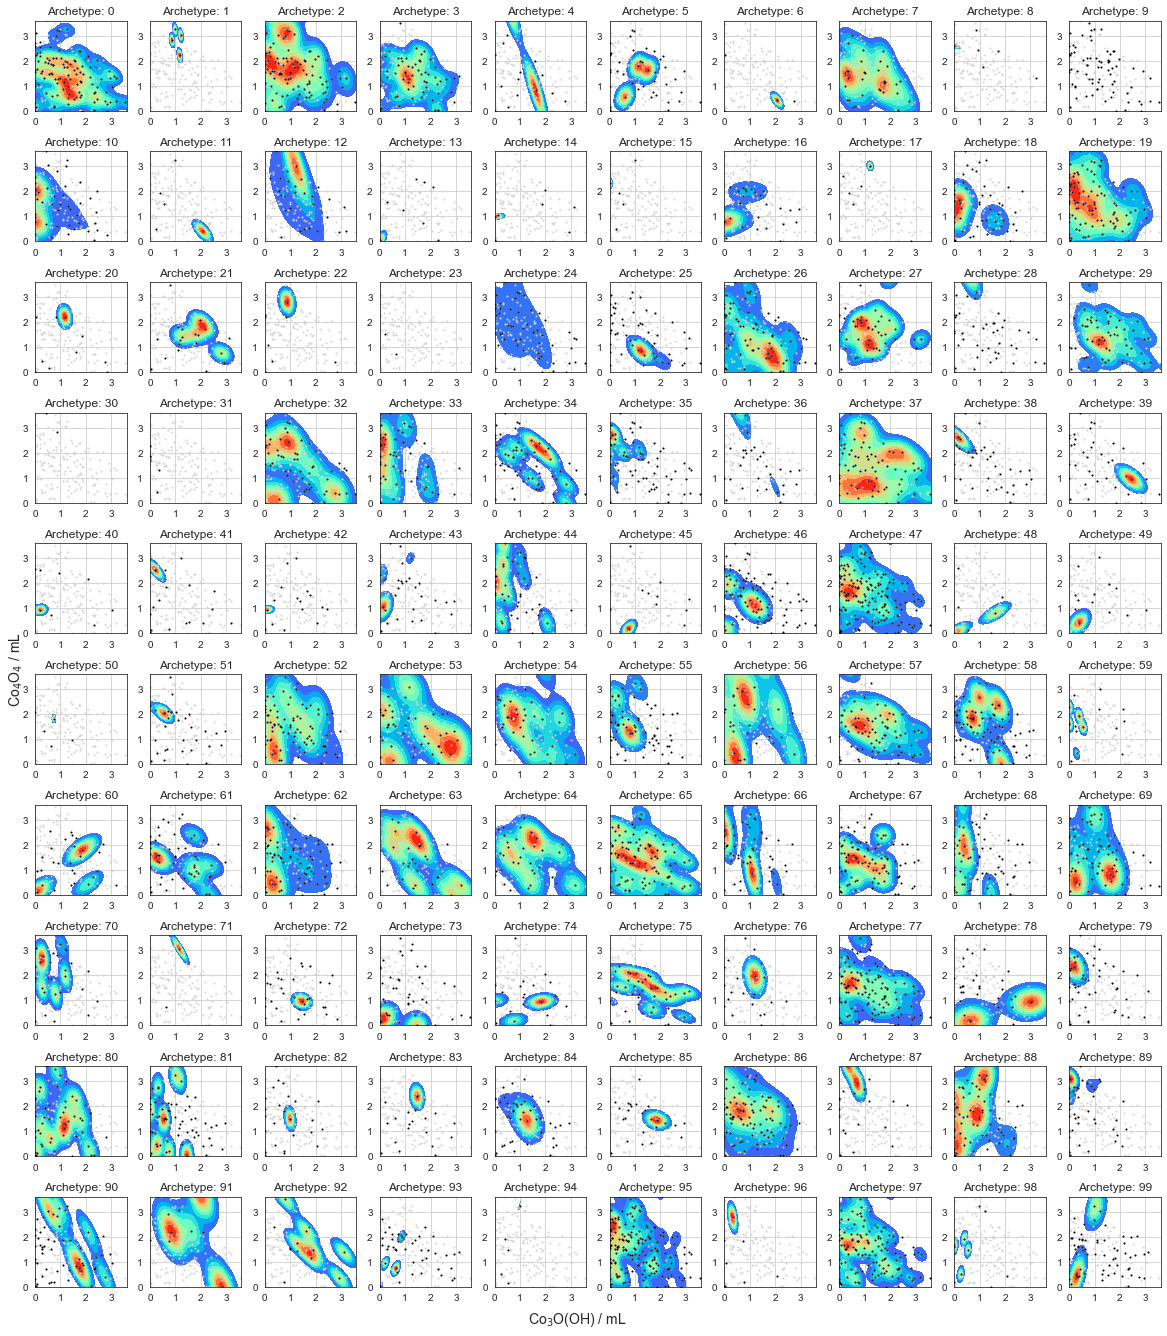

In [17]:
col_x = 'V_Co3O(OH)'
col_y = 'V_Co4O4'

x = cce_v[col_x]
y = cce_v[col_y]

fig, ax = plt.subplots(10,10, figsize=(11*1.5,11*1.7))
fig.subplots_adjust(wspace=0.1,hspace=0.1)

axes = [
    (0,0), (0,1), (0,2), (0,3), (0,4), (0,5), (0,6), (0,7), (0,8), (0,9),
    (1,0), (1,1), (1,2), (1,3), (1,4), (1,5), (1,6), (1,7), (1,8), (1,9),
    (2,0), (2,1), (2,2), (2,3), (2,4), (2,5), (2,6), (2,7), (2,8), (2,9),
    (3,0), (3,1), (3,2), (3,3), (3,4), (3,5), (3,6), (3,7), (3,8), (3,9),
    (4,0), (4,1), (4,2), (4,3), (4,4), (4,5), (4,6), (4,7), (4,8), (4,9),
    (5,0), (5,1), (5,2), (5,3), (5,4), (5,5), (5,6), (5,7), (5,8), (5,9),
    (6,0), (6,1), (6,2), (6,3), (6,4), (6,5), (6,6), (6,7), (6,8), (6,9),
    (7,0), (7,1), (7,2), (7,3), (7,4), (7,5), (7,6), (7,7), (7,8), (7,9),
    (8,0), (8,1), (8,2), (8,3), (8,4), (8,5), (8,6), (8,7), (8,8), (8,9),
    (9,0), (9,1), (9,2), (9,3), (9,4), (9,5), (9,6), (9,7), (9,8), (9,9),
    
]

no_axes = [
#    (10,0), (10,1), (10,2), (10,3), (10,4), (10,5), (10,6), (10,7), (10,8), (10,9),
]

for axis in no_axes:
    ax[axis].axis('off')

n=0
for z, axis in zip(W_ST.T, axes):
    #print('Archetype #%s' % n)
    
    sub_df = pd.DataFrame(np.array([x,y,z]).T, columns=['col_x','col_y','res'])
    sub_df = sub_df[sub_df['res'] > 0.0]
    
    xi = sub_df['col_x']
    yi = sub_df['col_y']
    zi = sub_df['res']
    
    col_x_list, col_y_list, res_list = list(), list(), list()
    m_list = list()

    for index, row in sub_df.iterrows():
        m=0
        for _ in range(math.ceil(row['res']*100)):
            col_x_list.append(row['col_x'])
            col_y_list.append(row['col_y'])
            res_list.append(row['res'])
            m+=1
        m_list.append(m)
        
    #print(len(sub_df), m_list)

    
    new_sub_df = pd.DataFrame(
        np.array([col_x_list,col_y_list,res_list]).T,
        columns=['col_x','col_y','res']
    )
    
    ax[axis].grid(visible=True, which='major')
    ax[axis].set_xticks([0.0, 1.0, 2.0, 3.0])
    ax[axis].set_yticks([0.0, 1.0, 2.0, 3.0])
    #ax[axis].set_facecolor('k')
    
    try:
        g = sns.kdeplot(
            new_sub_df['col_x'], new_sub_df['col_y'], 
            ax=ax[axis], zorder=1,
            cmap='rainbow', shade=True, shade_lowest=False,
            #vmin=0, vmax=3, #cbar=True,  
        )

        g.set(xlabel=None)
        g.set(ylabel=None)
    except:
        pass
    ax[axis].scatter(xi, yi, s=1, c='k', zorder=3)
    ax[axis].scatter(x, y, s=1, c='lightgrey', zorder=2)


    ax[axis].set_xlim(0,3.6)
    ax[axis].set_ylim(0,3.6)
    ax[axis].set_title('Archetype: %s' % n)
    #plt.show()
    
    n+=1
    
fig.supxlabel(r'Co$_{3}$O(OH) / mL', fontsize=14)
fig.supylabel(r'Co$_{4}$O$_{4}$ / mL', fontsize=14)
fig.tight_layout()
fig.show()

fig.savefig('output_vis//interpretation-CCE-5-wkde-solvothermal3.png')

# Cross-Reference with CCE_1 ST

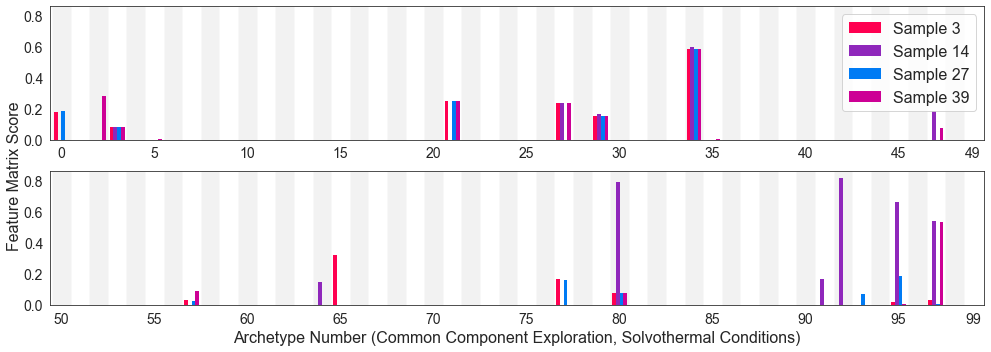

In [18]:
fig, ax = plt.subplots(2,1, figsize=(14,5))

bar_width=0.2

ax[0].bar(
    np.arange(0-0.3,50-0.3,1), W_ST[3][:50], ec=(0,0,0,0), fc='#ff0051', width=bar_width, zorder=2, label='Sample 3'
)
ax[0].bar(
    np.arange(0-0.1,50-0.1,1), W_ST[14][:50], ec=(0,0,0,0), fc='#8f27bb', width=bar_width, zorder=2, label='Sample 14'
)
ax[0].bar(
    np.arange(0+0.1,50+0.1,1), W_ST[27][:50], ec=(0,0,0,0), fc='#007bf4', width=bar_width, zorder=2, label='Sample 27'
)
ax[0].bar(
    np.arange(0+0.3,50+0.3,1), W_ST[39][:50], ec=(0,0,0,0), fc='#cd0095', width=bar_width, zorder=2, label='Sample 39'
)

ax[1].bar(np.arange(50-0.3,100-0.3,1), W_ST[3][50:], ec=(0,0,0,0), fc='#ff0051', width=bar_width, zorder=2)
ax[1].bar(np.arange(50-0.1, 99-0.1,1), W_ST[14][50:], ec=(0,0,0,0), fc='#8f27bb', width=bar_width, zorder=2)
ax[1].bar(np.arange(50+0.1,100+0.1,1), W_ST[27][50:], ec=(0,0,0,0), fc='#007bf4', width=bar_width, zorder=2)
ax[1].bar(np.arange(50+0.3,100+0.3,1), W_ST[39][50:], ec=(0,0,0,0), fc='#cd0095', width=bar_width, zorder=2)

y01,y02 = ax[0].get_ylim()
y11,y12 = ax[1].get_ylim()
y1_min = min([y01,y11])
y2_max = max([y02,y12])

for item in np.arange(0,50,2):
    ax[0].fill_between([item-0.5,item+0.5],[y1_min,y1_min],[y2_max,y2_max],fc=(0,0,0,0.05),ec=(0,0,0,0),zorder=1)
for item in np.arange(50,100,2):
    ax[1].fill_between([item-0.5,item+0.5],[y1_min,y1_min],[y2_max,y2_max],fc=(0,0,0,0.05),ec=(0,0,0,0),zorder=1)

ax[0].set_ylim(y1_min,y2_max)
ax[1].set_ylim(y1_min,y2_max)
    
#ax.grid(visible=True, which='major')
ax[0].set_xlim(-0.6,49.6)
ax[0].set_xticks([0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 49])
ax[0].set_yticks([0.0, 0.2, 0.4, 0.6, 0.8])

ax[1].set_xlim(49.4,99.6)
ax[1].set_xticks([50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 99])
ax[1].set_yticks([0.0, 0.2, 0.4, 0.6, 0.8])

ax[1].set_xlabel('Archetype Number (Common Component Exploration, Solvothermal Conditions)', fontsize=16)

ax[0].legend(fontsize=16)
ax[0].tick_params(axis='both', labelsize=14)
ax[1].tick_params(axis='both', labelsize=14)
#plt.yticks(fontsize=14)

fig.supylabel('Feature Matrix Score', fontsize=16)
fig.tight_layout()


fig.savefig('output_vis//interpretation-CCE-5-wkde-feature-matrix-correlation.png')

# Values and Purity

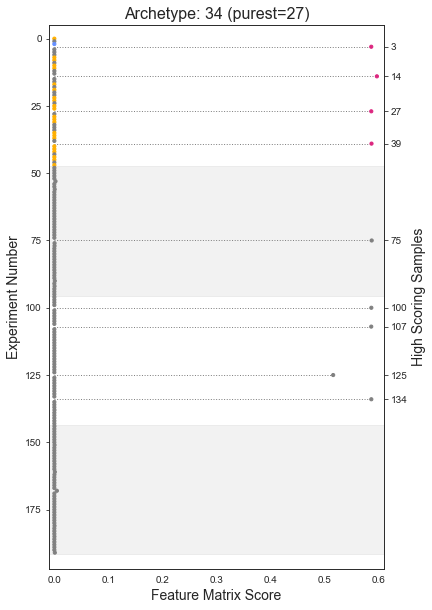

In [19]:
fig, ax = plt.subplots(1,1, figsize=(6,10))

c1,c2,c3,c4 = '#ffb000','#648fff','#dc267f','grey'

colors = [
    c1, c4, c2, c3, c4, c4, c4, c1, 
    c1, c4, c1, c1, c4, c4, c3, c4,
    c4, c1, c4, c1, c4, c4, c1, c1,
    c4, c1, c1, c3, c4, c1, c1, c1,
    c4, c4, c4, c1, c1, c1, c4, c3,
    c1, c1, c1, c4, c1, c1, c4, c1,
    
    c4, c4, c4, c4, c4, c4, c4, c4,
    c4, c4, c4, c4, c4, c4, c4, c4,
    c4, c4, c4, c4, c4, c4, c4, c4,
    c4, c4, c4, c4, c4, c4, c4, c4,
    c4, c4, c4, c4, c4, c4, c4, c4,
    c4, c4, c4, c4, c4, c4, c4, c4,
    
    c4, c4, c4, c4, c4, c4, c4, c4,
    c4, c4, c4, c4, c4, c4, c4, c4,
    c4, c4, c4, c4, c4, c4, c4, c4,
    c4, c4, c4, c4, c4, c4, c4, c4,
    c4, c4, c4, c4, c4, c4, c4, c4,
    c4, c4, c4, c4, c4, c4, c4, c4,
    
    c4, c4, c4, c4, c4, c4, c4, c4,
    c4, c4, c4, c4, c4, c4, c4, c4,
    c4, c4, c4, c4, c4, c4, c4, c4,
    c4, c4, c4, c4, c4, c4, c4, c4,
    c4, c4, c4, c4, c4, c4, c4, c4,
    c4, c4, c4, c4, c4, c4, c4, c4,
]

s1,s2 = 10, 10

sizes = [
    s1, s1, s1, s2, s1, s1, s1, s1, #  0
    s1, s1, s1, s1, s1, s1, s2, s1, #  8
    s1, s1, s1, s1, s1, s1, s1, s1, # 16
    s1, s1, s1, s2, s1, s1, s1, s1, # 24
    s1, s1, s1, s1, s1, s1, s1, s2, # 32
    s1, s1, s1, s1, s1, s1, s1, s1, # 40
    
    s1, s1, s1, s1, s1, s1, s1, s1, # 48
    s1, s1, s1, s1, s1, s1, s1, s1, # 56
    s1, s1, s1, s1, s1, s1, s1, s1, # 64
    s1, s1, s1, s2, s1, s1, s1, s1, # 72
    s1, s1, s1, s1, s1, s1, s1, s1, # 80
    s1, s1, s1, s1, s1, s1, s1, s1, # 88

    s1, s1, s1, s1, s2, s1, s1, s1, # 96
    s1, s1, s1, s2, s1, s1, s1, s1, # 104
    s1, s1, s1, s1, s1, s1, s1, s1, # 112
    s1, s1, s1, s1, s1, s2, s1, s1, # 120
    s1, s1, s1, s1, s1, s1, s2, s1, # 128
    s1, s1, s1, s1, s1, s1, s1, s1, # 136
    
    s1, s1, s1, s1, s1, s1, s1, s1, # 144
    s1, s1, s1, s1, s1, s1, s1, s1, # 152
    s1, s1, s1, s1, s1, s1, s1, s1, # 160
    s1, s1, s1, s1, s1, s1, s1, s1, # 168
    s1, s1, s1, s1, s1, s1, s1, s1, # 176
    s1, s1, s1, s1, s1, s1, s1, s1, # 184 - 191
]

plt.scatter(W_ST.T[34], np.arange(0,192,1), s=sizes, c=colors, zorder=3)

line_color = 'grey'

n= 3
plt.plot([0,W_ST.T[34][n]],[n,n], c=line_color, linestyle=':', linewidth=1, zorder=2)
#plt.plot([W_ST.T[34][n],0.61],[n,n], c=line_color, linestyle=':', linewidth=1, zorder=2)
n=14
plt.plot([0,W_ST.T[34][n]],[n,n], c=line_color, linestyle=':', linewidth=1, zorder=2)
#plt.plot([W_ST.T[34][n],0.61],[n,n], c=line_color, linestyle=':', linewidth=1, zorder=2)
n=27
plt.plot([0,W_ST.T[34][n]],[n,n], c=line_color, linestyle=':', linewidth=1, zorder=2)
#plt.plot([W_ST.T[34][n],0.61],[n,n], c=line_color, linestyle=':', linewidth=1, zorder=2)
n=39
plt.plot([0,W_ST.T[34][n]],[n,n], c=line_color, linestyle=':', linewidth=1, zorder=2)
#plt.plot([W_ST.T[34][n],0.61],[n,n], c=line_color, linestyle=':', linewidth=1, zorder=2)
n=75
plt.plot([0,W_ST.T[34][n]],[n,n], c=line_color, linestyle=':', linewidth=1, zorder=2)
#plt.plot([W_ST.T[34][n],0.61],[n,n], c=line_color, linestyle=':', linewidth=1, zorder=2)
n=100
plt.plot([0,W_ST.T[34][n]],[n,n], c=line_color, linestyle=':', linewidth=1, zorder=2)
#plt.plot([W_ST.T[34][n],0.61],[n,n], c=line_color, linestyle=':', linewidth=1, zorder=2)
n=107
plt.plot([0,W_ST.T[34][n]],[n,n], c=line_color, linestyle=':', linewidth=1, zorder=2)
#plt.plot([W_ST.T[34][n],0.61],[n,n], c=line_color, linestyle=':', linewidth=1, zorder=2)
n=125
plt.plot([0,W_ST.T[34][n]],[n,n], c=line_color, linestyle=':', linewidth=1, zorder=2)
#plt.plot([W_ST.T[34][n],0.61],[n,n], c=line_color, linestyle=':', linewidth=1, zorder=2)
n=134
plt.plot([0,W_ST.T[34][n]],[n,n], c=line_color, linestyle=':', linewidth=1, zorder=2)
#plt.plot([W_ST.T[34][n],0.61],[n,n], c=line_color, linestyle=':', linewidth=1, zorder=2)

fill_color='grey'#'#5cbff0'
ax.fill_between([-0.01,0.61],[47.5,47.5],[95.5,95.5], zorder=1, color=fill_color, alpha=0.1)
ax.fill_between([-0.01,0.61],[143.5,143.5],[191.5,191.5], zorder=1, color=fill_color, alpha=0.1)

ax.set_ylim(197,-5)
ax.set_xlim(-0.01,0.61)

ax2 = ax.twinx()
ax2.set_ylim(197,-5)
ax2.set_yticks([3, 14, 27, 39, 75, 100, 107, 125, 134])

ax.set_xlabel('Feature Matrix Score', fontsize=14)
ax.set_ylabel('Experiment Number', fontsize=14)
ax2.set_ylabel('High Scoring Samples', fontsize=14)
ax.set_title('Archetype: 34 (purest=27)', fontsize=16)

fig.savefig('output_vis//interpretation-CCE-5-wkde-arch34-purity.png')

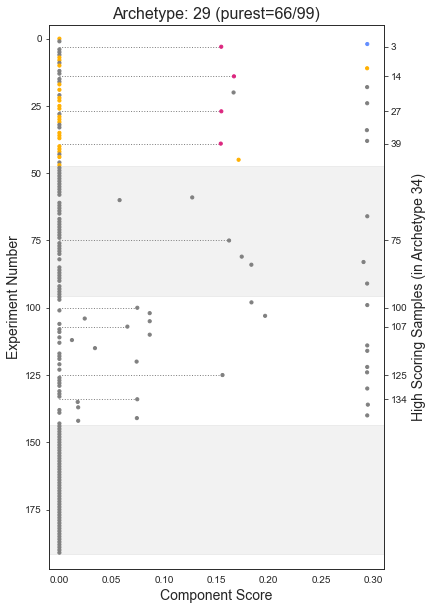

In [20]:
fig, ax = plt.subplots(1,1, figsize=(6,10))

arch=29

c1,c2,c3,c4 = '#ffb000','#648fff','#dc267f','grey'

colors = [
    c1, c4, c2, c3, c4, c4, c4, c1, 
    c1, c4, c1, c1, c4, c4, c3, c4,
    c4, c1, c4, c1, c4, c4, c1, c1,
    c4, c1, c1, c3, c4, c1, c1, c1,
    c4, c4, c4, c1, c1, c1, c4, c3,
    c1, c1, c1, c4, c1, c1, c4, c1,
    
    c4, c4, c4, c4, c4, c4, c4, c4,
    c4, c4, c4, c4, c4, c4, c4, c4,
    c4, c4, c4, c4, c4, c4, c4, c4,
    c4, c4, c4, c4, c4, c4, c4, c4,
    c4, c4, c4, c4, c4, c4, c4, c4,
    c4, c4, c4, c4, c4, c4, c4, c4,
    
    c4, c4, c4, c4, c4, c4, c4, c4,
    c4, c4, c4, c4, c4, c4, c4, c4,
    c4, c4, c4, c4, c4, c4, c4, c4,
    c4, c4, c4, c4, c4, c4, c4, c4,
    c4, c4, c4, c4, c4, c4, c4, c4,
    c4, c4, c4, c4, c4, c4, c4, c4,
    
    c4, c4, c4, c4, c4, c4, c4, c4,
    c4, c4, c4, c4, c4, c4, c4, c4,
    c4, c4, c4, c4, c4, c4, c4, c4,
    c4, c4, c4, c4, c4, c4, c4, c4,
    c4, c4, c4, c4, c4, c4, c4, c4,
    c4, c4, c4, c4, c4, c4, c4, c4,
]

s1,s2 = 10, 10

sizes = [
    s1, s1, s1, s2, s1, s1, s1, s1, #  0
    s1, s1, s1, s1, s1, s1, s2, s1, #  8
    s1, s1, s1, s1, s1, s1, s1, s1, # 16
    s1, s1, s1, s2, s1, s1, s1, s1, # 24
    s1, s1, s1, s1, s1, s1, s1, s2, # 32
    s1, s1, s1, s1, s1, s1, s1, s1, # 40
    
    s1, s1, s1, s1, s1, s1, s1, s1, # 48
    s1, s1, s1, s1, s1, s1, s1, s1, # 56
    s1, s1, s1, s1, s1, s1, s1, s1, # 64
    s1, s1, s1, s2, s1, s1, s1, s1, # 72
    s1, s1, s1, s1, s1, s1, s1, s1, # 80
    s1, s1, s1, s1, s1, s1, s1, s1, # 88

    s1, s1, s1, s1, s2, s1, s1, s1, # 96
    s1, s1, s1, s2, s1, s1, s1, s1, # 104
    s1, s1, s1, s1, s1, s1, s1, s1, # 112
    s1, s1, s1, s1, s1, s2, s1, s1, # 120
    s1, s1, s1, s1, s1, s1, s2, s1, # 128
    s1, s1, s1, s1, s1, s1, s1, s1, # 136
    
    s1, s1, s1, s1, s1, s1, s1, s1, # 144
    s1, s1, s1, s1, s1, s1, s1, s1, # 152
    s1, s1, s1, s1, s1, s1, s1, s1, # 160
    s1, s1, s1, s1, s1, s1, s1, s1, # 168
    s1, s1, s1, s1, s1, s1, s1, s1, # 176
    s1, s1, s1, s1, s1, s1, s1, s1, # 184 - 191
]

plt.scatter(W_ST.T[arch], np.arange(0,192,1), s=sizes, c=colors, zorder=3)

line_color = 'grey'

n= 3
plt.plot([0,W_ST.T[arch][n]],[n,n], c=line_color, linestyle=':', linewidth=1, zorder=2)
#plt.plot([W_ST.T[arch][n],0.61],[n,n], c=line_color, linestyle=':', linewidth=1, zorder=2)
n=14
plt.plot([0,W_ST.T[arch][n]],[n,n], c=line_color, linestyle=':', linewidth=1, zorder=2)
#plt.plot([W_ST.T[arch][n],0.61],[n,n], c=line_color, linestyle=':', linewidth=1, zorder=2)
n=27
plt.plot([0,W_ST.T[arch][n]],[n,n], c=line_color, linestyle=':', linewidth=1, zorder=2)
#plt.plot([W_ST.T[arch][n],0.61],[n,n], c=line_color, linestyle=':', linewidth=1, zorder=2)
n=39
plt.plot([0,W_ST.T[arch][n]],[n,n], c=line_color, linestyle=':', linewidth=1, zorder=2)
#plt.plot([W_ST.T[arch][n],0.61],[n,n], c=line_color, linestyle=':', linewidth=1, zorder=2)
n=75
plt.plot([0,W_ST.T[arch][n]],[n,n], c=line_color, linestyle=':', linewidth=1, zorder=2)
#plt.plot([W_ST.T[arch][n],0.61],[n,n], c=line_color, linestyle=':', linewidth=1, zorder=2)
n=100
plt.plot([0,W_ST.T[arch][n]],[n,n], c=line_color, linestyle=':', linewidth=1, zorder=2)
#plt.plot([W_ST.T[arch][n],0.61],[n,n], c=line_color, linestyle=':', linewidth=1, zorder=2)
n=107
plt.plot([0,W_ST.T[arch][n]],[n,n], c=line_color, linestyle=':', linewidth=1, zorder=2)
#plt.plot([W_ST.T[arch][n],0.61],[n,n], c=line_color, linestyle=':', linewidth=1, zorder=2)
n=125
plt.plot([0,W_ST.T[arch][n]],[n,n], c=line_color, linestyle=':', linewidth=1, zorder=2)
#plt.plot([W_ST.T[arch][n],0.61],[n,n], c=line_color, linestyle=':', linewidth=1, zorder=2)
n=134
plt.plot([0,W_ST.T[arch][n]],[n,n], c=line_color, linestyle=':', linewidth=1, zorder=2)
#plt.plot([W_ST.T[arch][n],0.61],[n,n], c=line_color, linestyle=':', linewidth=1, zorder=2)


fill_color='grey'#'#5cbff0'
ax.fill_between([-0.01,0.61],[47.5,47.5],[95.5,95.5], zorder=1, color=fill_color, alpha=0.1)
ax.fill_between([-0.01,0.61],[143.5,143.5],[191.5,191.5], zorder=1, color=fill_color, alpha=0.1)

ax.set_ylim(197,-5)
ax.set_xlim(-0.01,0.31)

ax2 = ax.twinx()
ax2.set_ylim(197,-5)
ax2.set_yticks([3, 14, 27, 39, 75, 100, 107, 125, 134])

ax.set_xlabel('Feature Matrix Score', fontsize=14)
ax.set_ylabel('Experiment Number', fontsize=14)
ax2.set_ylabel('High Scoring Samples (in Archetype 34)', fontsize=14)
ax.set_title('Archetype: 29 (purest=66/99)', fontsize=16)

fig.savefig('output_vis//interpretation-CCE-5-wkde-arch29-purity.png')

In [21]:
"""
samples_29 = [
    2, 3, 11, 14, 18, 20, 24, 27, 34, 38, 39,
    45, 59, 60, 66, 75, 81, 83, 84, 91, 98, 99,
    100, 102, 103, 104, 105, 107, 110, 112, 114, 115, 116,
    120, 122, 124, 125, 130, 134, 135, 136, 137, 140, 141, 142
]

for item in samples_29:
    #plt.scatter(np.arange(0,100,1),W_ST[item])
    #plt.plot([34,34],[0,0.6])
    #plt.show()
    
    print(item, W_ST[item][29] / sum(W_ST[item]))
"""

'\nsamples_29 = [\n    2, 3, 11, 14, 18, 20, 24, 27, 34, 38, 39,\n    45, 59, 60, 66, 75, 81, 83, 84, 91, 98, 99,\n    100, 102, 103, 104, 105, 107, 110, 112, 114, 115, 116,\n    120, 122, 124, 125, 130, 134, 135, 136, 137, 140, 141, 142\n]\n\nfor item in samples_29:\n    #plt.scatter(np.arange(0,100,1),W_ST[item])\n    #plt.plot([34,34],[0,0.6])\n    #plt.show()\n    \n    print(item, W_ST[item][29] / sum(W_ST[item]))\n'

# Archetype Prevalence across Process Space

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\kde.py:567: RuntimeWarning: Degrees of freedom <= 0 for slice
  aweights=self.weights))
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\numpy\lib\function_base.py:2542: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\numpy\lib\function_base.py:2542: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


KDEPLOT FAILED: (5,6) V_OA, V_Dy | len(new_sub_df): 1
KDEPLOT FAILED: (5,8) V_TMTACN, V_Dy | len(new_sub_df): 2


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\kde.py:567: RuntimeWarning: Degrees of freedom <= 0 for slice
  aweights=self.weights))
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\numpy\lib\function_base.py:2542: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)
C:\Users\group\AppData\Roaming\Python\Python37\site-packages\numpy\lib\function_base.py:2542: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)


KDEPLOT FAILED: (3,4) V_Dy, V_OA | len(new_sub_df): 1
KDEPLOT FAILED: (1,4) V_Dy, V_TMTACN | len(new_sub_df): 2


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:171: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


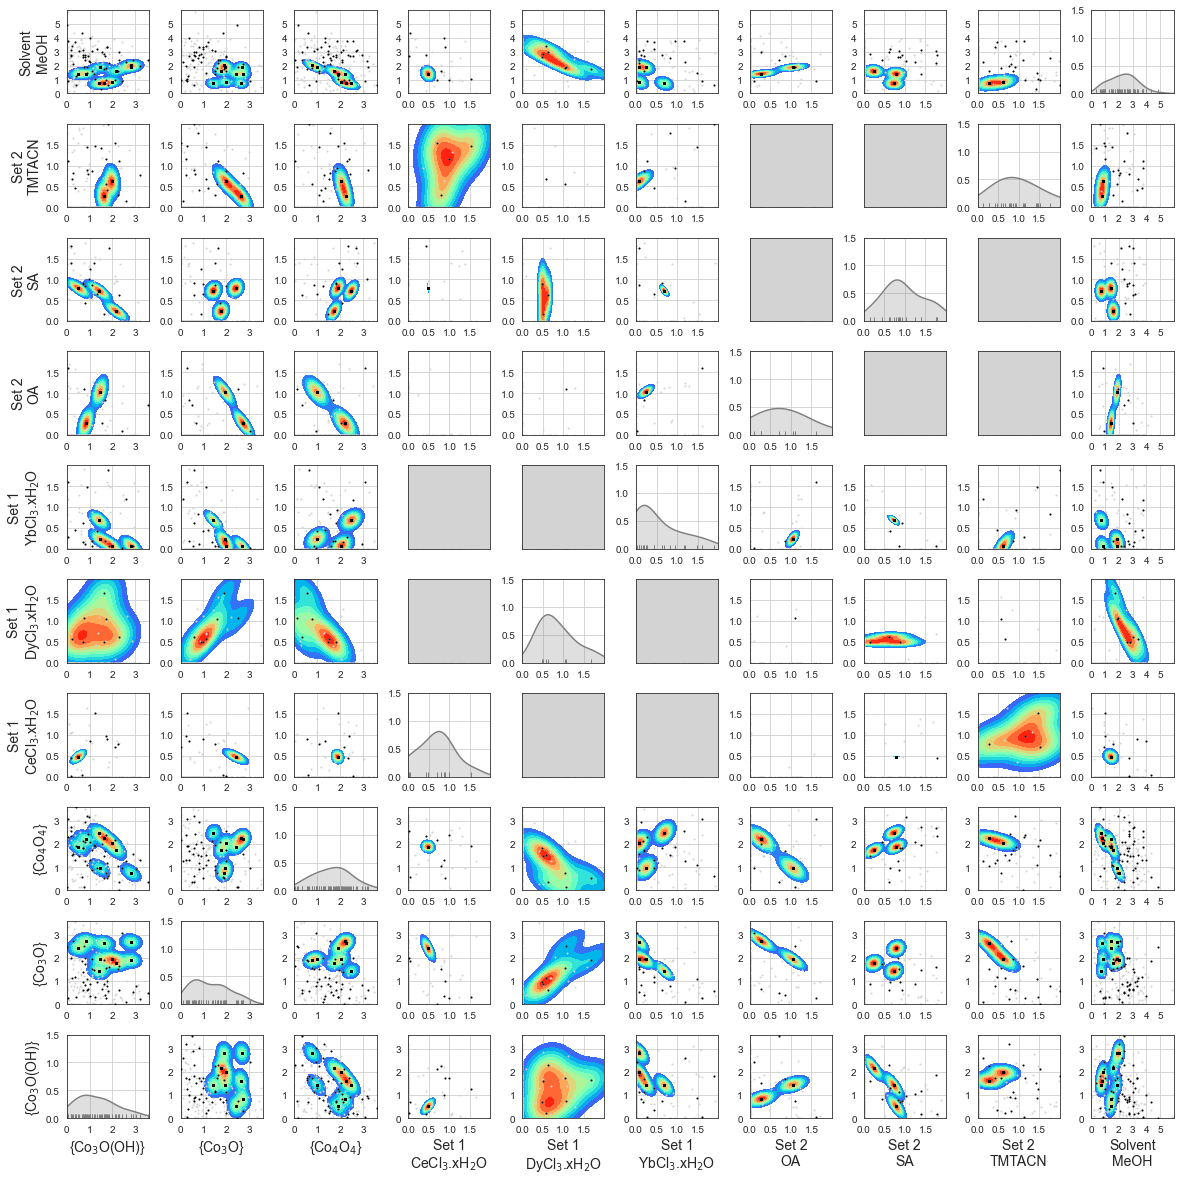

In [22]:
z = W_ST.T[34]
n_var = 10
range_cluster = 3.6 
range_add = 2.0
range_solv = 6.0

df = deepcopy(cce_v)
#df = df.replace(0.0, np.nan)

fig, ax = plt.subplots(n_var,n_var, figsize=(11*1.5,11*1.5))
fig.subplots_adjust(wspace=0.1,hspace=0.1)

scale_dict = {
    'V_Co3O(OH)': (0, range_cluster, 1),
    'V_Co3O':     (0, range_cluster, 1),
    'V_Co4O4':    (0, range_cluster, 1),
    'V_Ce':       (0, range_add, 0.5),
    'V_Dy':       (0, range_add, 0.5),
    'V_Yb':       (0, range_add, 0.5),
    'V_OA':       (0, range_add, 0.5),
    'V_SA':       (0, range_add, 0.5),
    'V_TMTACN':   (0, range_add, 0.5),
    'V_MeOH':     (0, range_solv, 1),
}


z_min = min(z)
z_max = max(z)

for count_y, col_y in zip(np.arange(0,n_var,1), df.columns):
    ax_y = n_var-1-count_y

    for ax_x,col_x in zip(np.arange(0,n_var,1), df.columns):
        #print(r'(%s,%s) %s, %s' % (ax_y, ax_x, col_x, col_y))

        x = df[col_x]
        y = df[col_y]

        sub_df = pd.DataFrame(np.array([x,y,z]).T, columns=['col_x','col_y','res'])
        sub_df = sub_df[sub_df['res'] > 0.0]

        xi = sub_df['col_x']
        yi = sub_df['col_y']
        zi = sub_df['res']

        col_x_list, col_y_list, res_list = list(), list(), list()
        m_list = list()

        for index, row in sub_df.iterrows():
            m=0
            for _ in range(math.ceil(row['res']*100)):
                col_x_list.append(row['col_x'])
                col_y_list.append(row['col_y'])
                res_list.append(row['res'])
                m+=1
            m_list.append(m)


        new_sub_df = pd.DataFrame(
            np.array([col_x_list,col_y_list,res_list]).T,
            columns=['col_x','col_y','res']
        )


        new_sub_df = new_sub_df[new_sub_df['col_x'] > 0.0]
        new_sub_df = new_sub_df[new_sub_df['col_y'] > 0.0]


        if col_x != col_y:
            try:
                g = sns.kdeplot(
                    new_sub_df['col_x'], new_sub_df['col_y'], 
                    ax=ax[ax_y,ax_x], zorder=1,
                    cmap='rainbow', shade=True, shade_lowest=False,
                    #vmin=math.ceil(z_min*100), vmax=math.ceil(z_max*100), cbar=True,  
                )

                g.set(xlabel=None)
                g.set(ylabel=None)

            except:
                print(
                    r'KDEPLOT FAILED: (%s,%s) %s, %s | len(new_sub_df): %s' 
                    % (ax_y, ax_x, col_x, col_y, len(new_sub_df))
                )

            ax[ax_y,ax_x].scatter(new_sub_df['col_x'], new_sub_df['col_y'], s=1, c='k', zorder=3)
            ax[ax_y,ax_x].scatter(x, y, s=1, c='lightgrey', zorder=2)

        else:
            #ax[ax_y,ax_x].scatter(xi, yi, c=zi, cmap='Greys', alpha=0.5, s=10)
            #ax[ax_y,ax_x].scatter(xi, zi, alpha=0.5, s=10, c='k')
            #ax[ax_y,ax_x].hist(xi)

            xi_no_zeroes = list()
            for x_item in xi:
                if x_item != 0.0:
                    xi_no_zeroes.append(x_item)

            try:
                line = sns.distplot(
                    xi_no_zeroes, ax=ax[ax_y,ax_x], 
                    rug=True, hist=False, kde=True, 
                    color='grey', kde_kws = {'shade': True, 'linewidth': 1.5}
                )
            except:
                print(
                    r'DISTPLOT FAILED: (%s,%s) %s, %s | len(xi_no_zeroes): %s' 
                    % (ax_y, ax_x, col_x, col_y, len(xi_no_zeroes))
                )                    


        ax[ax_y,ax_x].grid(visible=True, which='major')
        ax[ax_y,ax_x].set_xticks(np.arange(0,scale_dict[col_x][1],scale_dict[col_x][2]))
        ax[ax_y,ax_x].set_yticks(np.arange(0,scale_dict[col_y][1],scale_dict[col_y][2]))

        x1, x2 = ax[ax_y,ax_x].get_xlim()
        y1, y2 = ax[ax_y,ax_x].get_ylim()

        ax[ax_y,ax_x].set_xlim(scale_dict[col_x][:2])
        ax[ax_y,ax_x].set_ylim(scale_dict[col_y][:2])            


diagonal_axes = [
    (9,0), (8,1), (7,2), (6,3), (5,4), (4,5), (3,6), (2,7), (1,8), (0,9)
]   

for axis in diagonal_axes:
    ax[axis].set_ylim(0.0,1.5) 
    #interval = max(sub_df['res'])/5

    #ticks = np.arange(0,max(sub_df['res']),interval)
    #ticks = list(ticks)
    #ticks.append(max(sub_df['res']))
    #ticks = [round(x,2) for x in ticks]
    ticks = [0.0, 0.5, 1.0, 1.5]

    ax[axis].set_yticks(ticks)

no_axes = [
    (1,6), (1,7), (2,6), (2,8), (3,7), (3,8),
    (4,3), (4,4), (5,3), (5,5), (6,4), (6,5)
]

for axis in no_axes:
    #ax[axis].axis('off')
    ax[axis].set_xticks([])
    ax[axis].set_yticks([])
    ax[axis].set_facecolor('lightgrey')

x_axes = [(9,0), (9,1), (9,2), (9,3), (9,4), (9,5), (9,6), (9,7), (9,8), (9,9)]
y_axes = [(0,0), (1,0), (2,0), (3,0), (4,0), (5,0), (6,0), (7,0), (8,0), (9,0)]

labels = [
    '{Co$_{3}$O(OH)}', '{Co$_{3}$O}', '{Co$_{4}$O$_{4}$}', 
    'Set 1\nCeCl$_{3}$.xH$_{2}$O', 'Set 1\nDyCl$_{3}$.xH$_{2}$O', 'Set 1\nYbCl$_{3}$.xH$_{2}$O', 
    'Set 2\nOA', 'Set 2\nSA', 'Set 2\nTMTACN', 
    'Solvent\nMeOH'
]

for x_, lab in zip(x_axes, labels):
    ax[x_].set_xlabel(lab, fontsize=14)

labels.reverse()

for y_, lab in zip(y_axes, labels):
    ax[y_].set_ylabel(lab, fontsize=14)


fig.tight_layout()
fig.show()

fig.savefig('output_vis//interpretation-CCE-5-wkde-arch34.png')

# Sample MS containing Archetype 34

In [23]:
# define path to .xml format MS files
path_std = "data_ms\\Standards\\"
path1 = "data_ms\\CCE_1\\"
path2 = "data_ms\\CCE_2\\"
path3 = "data_ms\\CCE_3\\"
path4 = "data_ms\\CCE_4\\"

# CCE_1
s103c = vis.import_MS(path1+"CCE_1_03_HT.xml", "CCE_1_03 HT")
s114c = vis.import_MS(path1+"CCE_1_14_HT.xml", "CCE_1_14 HT")
s127c = vis.import_MS(path1+"CCE_1_27_HT.xml", "CCE_1_27 HT")
s139c = vis.import_MS(path1+"CCE_1_39_HT.xml", "CCE_1_39 HT")

# CCE_2
s227c = vis.import_MS(path2+"CCE_2_27_HT.xml", "CCE_2_27 HT")

# CCE_3
s304c = vis.import_MS(path3+"CCE_3_04_HT.xml", "CCE_3_04 HT")
s311c = vis.import_MS(path3+"CCE_3_11_HT.xml", "CCE_3_11 HT")
s329c = vis.import_MS(path3+"CCE_3_29_HT.xml", "CCE_3_29 HT")
s338c = vis.import_MS(path3+"CCE_3_38_HT.xml", "CCE_3_38 HT")

# CCE_4

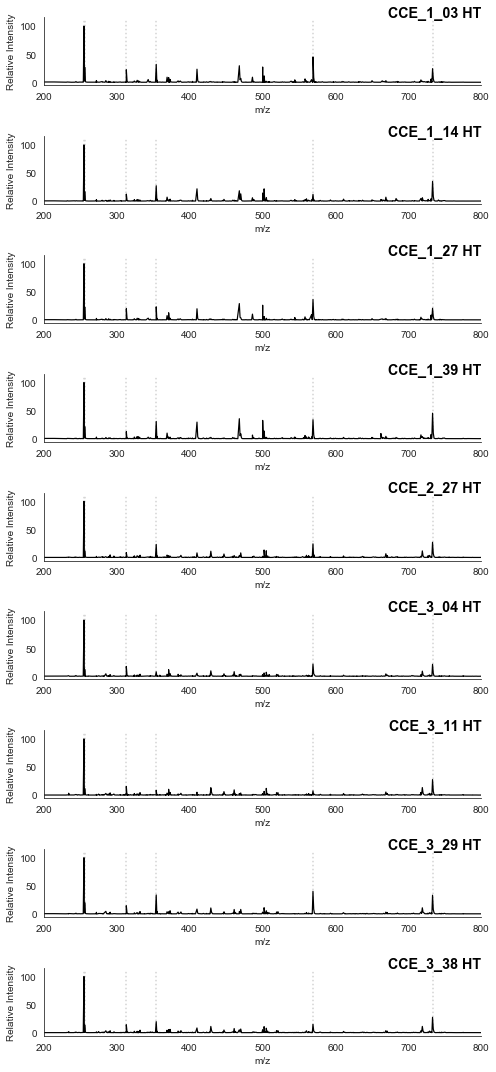

In [24]:
fig, ax = plt.subplots(9,1, figsize=(7,15))

axes = [0,1,2,3,4,5,6,7,8]
samples = [s103c, s114c, s127c, s139c, s227c, s304c, s311c, s329c, s338c]

for axis, item in zip(axes, samples):
    ax[axis].set_xlim(200,800)
    #ax[axis].set_ylim(-1,50)
    
    #for x in [563, 289, 279, 740, 337, 586]:
    for x in [255,256,313,354,569,734]:
        ax[axis].plot([x,x],[0,110], 'lightgrey', linestyle=':', zorder=1)
        
vis.plot(s103c, fig=fig, ax=ax[0], peaks=False)
vis.plot(s114c, fig=fig, ax=ax[1], peaks=False)
vis.plot(s127c, fig=fig, ax=ax[2], peaks=False)
vis.plot(s139c, fig=fig, ax=ax[3], peaks=False)

vis.plot(s227c, fig=fig, ax=ax[4], peaks=False)

vis.plot(s304c, fig=fig, ax=ax[5], peaks=False)
vis.plot(s311c, fig=fig, ax=ax[6], peaks=False)
vis.plot(s329c, fig=fig, ax=ax[7], peaks=False)
vis.plot(s338c, fig=fig, ax=ax[8], peaks=False)

fig.tight_layout()

fig.savefig('output_vis//interpretation-CCE-5-wkde-arch34-mass-spec.png')

# Manuscript Figure

V_Co3O(OH)  V_Co3O  V_Co4O4  V_MeOH
CCE_1_0         1.28    2.24     0.50    2.46
CCE_1_1         2.31    0.60     0.35    3.01
CCE_1_2         0.90    2.96     1.25    0.04
CCE_1_3         2.17    1.77     1.73    1.60
CCE_1_4         2.94    0.26     1.31    1.41
...              ...     ...      ...     ...
CCE_4_43        0.25    0.03     0.50    2.33
CCE_4_44        1.61    0.79     0.81    2.32
CCE_4_45        1.19    1.50     1.97    1.43
CCE_4_46        0.26    0.00     4.45    1.14
CCE_4_47        0.06    0.00     2.29    3.75

[192 rows x 4 columns]

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:120: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


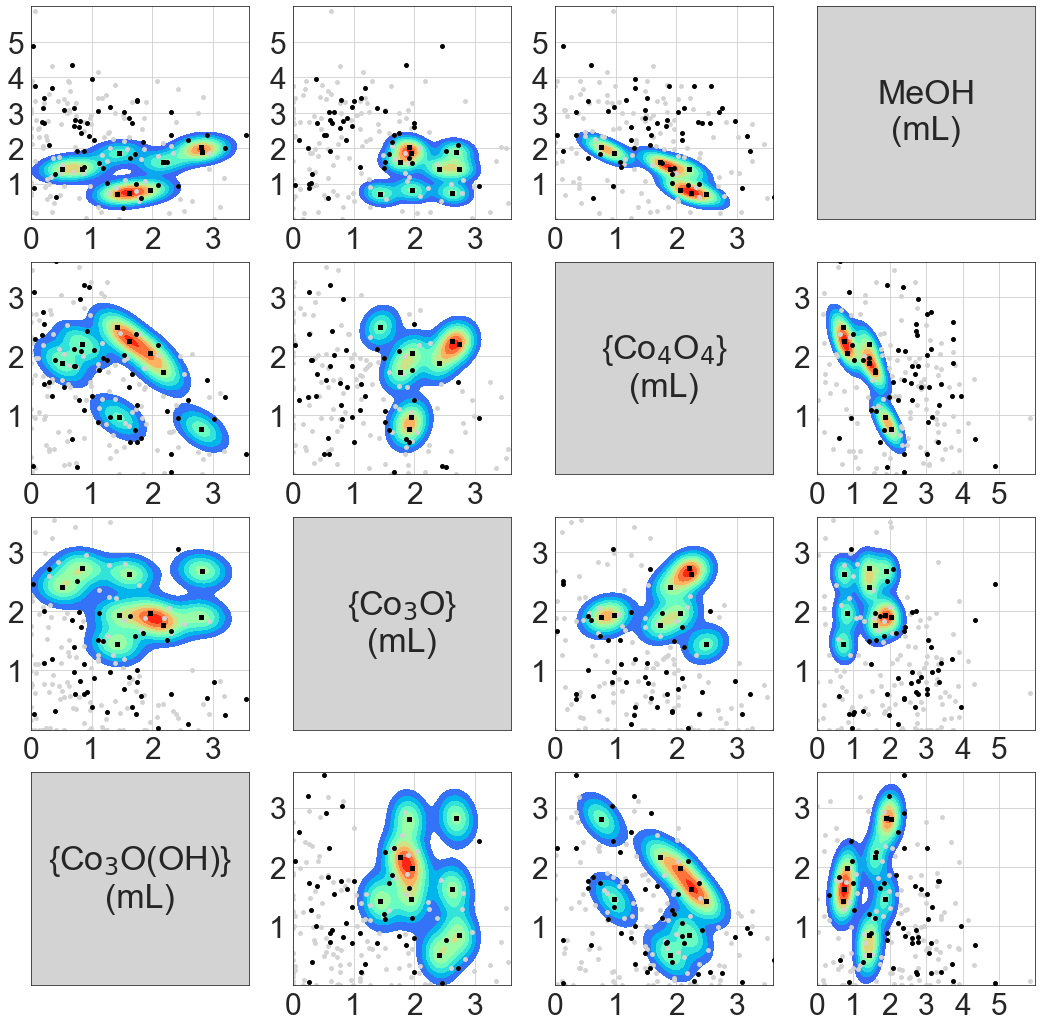

In [25]:
z = W_ST.T[34]
n_var = 4
range_cluster = 3.6 
range_add = 2.0
range_solv = 6.0

#df = deepcopy(cce_v)
df = pd.DataFrame([cce_v['V_Co3O(OH)'], cce_v['V_Co3O'], cce_v['V_Co4O4'], cce_v['V_MeOH']])
df = df.T
display(df)


fig, ax = plt.subplots(n_var,n_var, figsize=(18,18))
fig.subplots_adjust(wspace=0.2,hspace=0.2)

scale_dict = {
    'V_Co3O(OH)': (0, range_cluster, 1),
    'V_Co3O':     (0, range_cluster, 1),
    'V_Co4O4':    (0, range_cluster, 1),
    'V_MeOH':     (0, range_solv, 1),
}


z_min = min(z)
z_max = max(z)

for count_y, col_y in zip(np.arange(0,n_var,1), df.columns):
    ax_y = n_var-1-count_y

    for ax_x,col_x in zip(np.arange(0,n_var,1), df.columns):
        #print(r'(%s,%s) %s, %s' % (ax_y, ax_x, col_x, col_y))

        x = df[col_x]
        y = df[col_y]

        sub_df = pd.DataFrame(np.array([x,y,z]).T, columns=['col_x','col_y','res'])
        sub_df = sub_df[sub_df['res'] > 0.0]

        xi = sub_df['col_x']
        yi = sub_df['col_y']
        zi = sub_df['res']

        col_x_list, col_y_list, res_list = list(), list(), list()
        m_list = list()

        for index, row in sub_df.iterrows():
            m=0
            for _ in range(math.ceil(row['res']*100)):
                col_x_list.append(row['col_x'])
                col_y_list.append(row['col_y'])
                res_list.append(row['res'])
                m+=1
            m_list.append(m)


        new_sub_df = pd.DataFrame(
            np.array([col_x_list,col_y_list,res_list]).T,
            columns=['col_x','col_y','res']
        )


        new_sub_df = new_sub_df[new_sub_df['col_x'] > 0.0]
        new_sub_df = new_sub_df[new_sub_df['col_y'] > 0.0]


        if col_x != col_y:
            try:
                g = sns.kdeplot(
                    new_sub_df['col_x'], new_sub_df['col_y'], 
                    ax=ax[ax_y,ax_x], zorder=1,
                    cmap='rainbow', shade=True, shade_lowest=False,
                    #vmin=math.ceil(z_min*100), vmax=math.ceil(z_max*100), cbar=True,  
                )

                g.set(xlabel=None)
                g.set(ylabel=None)

            except:
                print(
                    r'KDEPLOT FAILED: (%s,%s) %s, %s | len(new_sub_df): %s' 
                    % (ax_y, ax_x, col_x, col_y, len(new_sub_df))
                )

            ax[ax_y,ax_x].scatter(new_sub_df['col_x'], new_sub_df['col_y'], s=15, c='k', zorder=3)
            ax[ax_y,ax_x].scatter(x, y, s=15, c='lightgrey', zorder=2)

            ax[ax_y,ax_x].grid(visible=True, which='major')
            ax[ax_y,ax_x].tick_params(axis='both', which='major', labelsize=30)
            ax[ax_y,ax_x].set_xticks(np.arange(0,scale_dict[col_x][1],scale_dict[col_x][2]))
            ax[ax_y,ax_x].set_yticks(np.arange(1,scale_dict[col_y][1],scale_dict[col_y][2]))

            x1, x2 = ax[ax_y,ax_x].get_xlim()
            y1, y2 = ax[ax_y,ax_x].get_ylim()

            ax[ax_y,ax_x].set_xlim(scale_dict[col_x][:2])
            ax[ax_y,ax_x].set_ylim(scale_dict[col_y][:2])  
            
        else:
            pass
         


diagonal_axes = [
    (3,0), (2,1), (1,2), (0,3),# (5,4), (4,5), (3,6), (2,7), (1,8), (0,9)
]   

diagonal_labels = [
    '{Co$_{3}$O(OH)}\n(mL)', '{Co$_{3}$O}\n(mL)', '{Co$_{4}$O$_{4}$}\n(mL)', 'MeOH\n(mL)'
]

for axis, label in zip(diagonal_axes, diagonal_labels):
    ax[axis].set_xlim(-0.1,0.1)
    ax[axis].set_ylim(-0.1,0.1)
    ax[axis].set_facecolor('lightgrey') 
    ax[axis].set_xticks([])
    ax[axis].set_yticks([])
    ax[axis].annotate(label, xy=(0,0), fontsize=34, ha='center', va='center')


fig.show()

fig.savefig('output_vis//interpretation-CCE-5-wkde-MS-feature.png')

In [26]:
df_H_ST = df_H_ST.T

with open('output_interpretation//cce_count_ST.txt') as f:
    count_temp = json.loads(f.read())
    
count_ST = {}
for key in count_temp:
    count_ST[float(key)] = count_temp[key]

df_H_ST['m/z'] = count_ST.keys()

df_H_ST

0         1    2    3    4    5         6    7    8         9  ...  \
0    0.0  0.826722  0.0  0.0  0.0  0.0  0.000000  0.0  0.0  0.000000  ...   
1    0.0  0.000000  0.0  0.0  0.0  0.0  0.000000  0.0  0.0  0.000000  ...   
2    0.0  0.737351  0.0  0.0  0.0  0.0  0.672039  0.0  0.0  0.000000  ...   
3    0.0  0.000000  0.0  0.0  0.0  0.0  0.000000  0.0  0.0  0.000000  ...   
4    0.0  0.000000  0.0  0.0  0.0  0.0  0.000000  0.0  0.0  0.000000  ...   
..   ...       ...  ...  ...  ...  ...       ...  ...  ...       ...  ...   
299  0.0  0.000000  0.0  0.0  0.0  0.0  0.000000  0.0  0.0  0.391618  ...   
300  0.0  0.000000  0.0  0.0  0.0  0.0  0.000000  0.0  0.0  0.000000  ...   
301  0.0  0.000000  0.0  0.0  0.0  0.0  0.000000  0.0  0.0  0.000000  ...   
302  0.0  0.000000  0.0  0.0  0.0  0.0  0.000000  0.0  0.0  0.000000  ...   
303  0.0  0.000000  0.0  0.0  0.0  0.0  0.000000  0.0  0.0  0.000000  ...   

      91   92            93        94   95        96   97   98   99     m/z  
0    0.0  0.0  0.000000e+00  0.063508  0.0  0.000000  0.0  0.0  0.0   313.0  
1    0.0  0.0  6.693262e-12  0.000000  0.0  0.000000  0.0  0.0  0.0   354.0  
2    0.0  0.0  0.000000e+00  0.044732  0.0  0.969664  0.0  0.0  0.0   255.0  
3    0.0  0.0  6.431644e-12  0.215079  0.0  0.000000  0.0  0.0  0.0   256.0  
4    0.0  0.0  0.000000e+00  0.000000  0.0  0.000000  0.0  0.0  0.0   569.0  
..   ...  ...           ...       ...  ...       ...  ...  ...  ...     ...  
299  0.0  0.0  0.000000e+00  0.000000  0.0  0.000000  0.0  0.0  0.0  1311.0  
300  0.0  0.0  0.000000e+00  0.000000  0.0  0.000000  0.0  0.0  0.0  1407.0  
301  0.0  0.0  0.000000e+00  0.000000  0.0  0.000000  0.0  0.0  0.0  1421.0  
302  0.0  0.0  0.000000e+00  0.000000  0.0  0.000000  0.0  0.0  0.0  1435.0  
303  0.0  0.0  0.000000e+00  0.000000  0.0  0.000000  0.0  0.0  0.0  1449.0  

[304 rows x 101 columns]

In [27]:
lst = sorted(list(count_ST.keys()))
df_H_ST['m/z-sorted'] = lst
df_H_ST

0         1    2    3    4    5         6    7    8         9  ...  \
0    0.0  0.826722  0.0  0.0  0.0  0.0  0.000000  0.0  0.0  0.000000  ...   
1    0.0  0.000000  0.0  0.0  0.0  0.0  0.000000  0.0  0.0  0.000000  ...   
2    0.0  0.737351  0.0  0.0  0.0  0.0  0.672039  0.0  0.0  0.000000  ...   
3    0.0  0.000000  0.0  0.0  0.0  0.0  0.000000  0.0  0.0  0.000000  ...   
4    0.0  0.000000  0.0  0.0  0.0  0.0  0.000000  0.0  0.0  0.000000  ...   
..   ...       ...  ...  ...  ...  ...       ...  ...  ...       ...  ...   
299  0.0  0.000000  0.0  0.0  0.0  0.0  0.000000  0.0  0.0  0.391618  ...   
300  0.0  0.000000  0.0  0.0  0.0  0.0  0.000000  0.0  0.0  0.000000  ...   
301  0.0  0.000000  0.0  0.0  0.0  0.0  0.000000  0.0  0.0  0.000000  ...   
302  0.0  0.000000  0.0  0.0  0.0  0.0  0.000000  0.0  0.0  0.000000  ...   
303  0.0  0.000000  0.0  0.0  0.0  0.0  0.000000  0.0  0.0  0.000000  ...   

      92            93        94   95        96   97   98   99     m/z  \
0    0.0  0.000000e+00  0.063508  0.0  0.000000  0.0  0.0  0.0   313.0   
1    0.0  6.693262e-12  0.000000  0.0  0.000000  0.0  0.0  0.0   354.0   
2    0.0  0.000000e+00  0.044732  0.0  0.969664  0.0  0.0  0.0   255.0   
3    0.0  6.431644e-12  0.215079  0.0  0.000000  0.0  0.0  0.0   256.0   
4    0.0  0.000000e+00  0.000000  0.0  0.000000  0.0  0.0  0.0   569.0   
..   ...           ...       ...  ...       ...  ...  ...  ...     ...   
299  0.0  0.000000e+00  0.000000  0.0  0.000000  0.0  0.0  0.0  1311.0   
300  0.0  0.000000e+00  0.000000  0.0  0.000000  0.0  0.0  0.0  1407.0   
301  0.0  0.000000e+00  0.000000  0.0  0.000000  0.0  0.0  0.0  1421.0   
302  0.0  0.000000e+00  0.000000  0.0  0.000000  0.0  0.0  0.0  1435.0   
303  0.0  0.000000e+00  0.000000  0.0  0.000000  0.0  0.0  0.0  1449.0   

     m/z-sorted  
0         228.0  
1         232.0  
2         234.0  
3         239.0  
4         242.0  
..          ...  
299      1311.0  
300      1407.0  
301      1421.0  
302      1435.0  
303      1449.0  

[304 rows x 102 columns]

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  # This is added back by InteractiveShellApp.init_path()
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  if sys.path[0] == '':


255.0
256.0
313.0
354.0
569.0
669.0
733.0
734.0


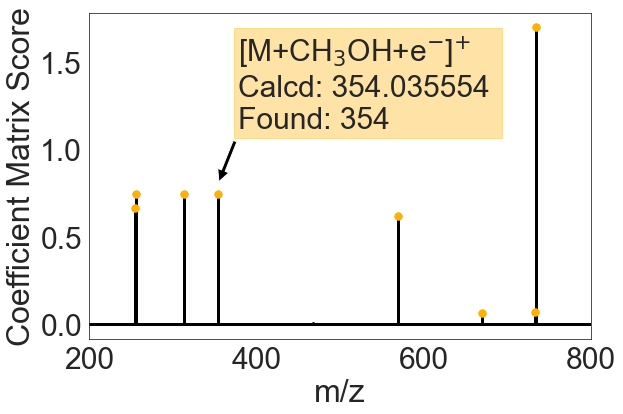

In [30]:
fig,ax = plt.subplots(1,1, figsize=(9,6), sharex=True)

arch=34

ax.set_xlim(200,800)
#ax.set_ylim(-0.015,0.3)

ax.set_xlabel('m/z', fontsize=32)
ax.set_ylabel('Coefficient Matrix Score', fontsize=32)
#ax.tick_params(axis='both', labelsize=24)
ax.set_xticklabels([200,'',400,'',600,'',800,'',1000], fontsize=30)
ax.set_yticklabels(['',0.0,'',0.5,'',1.0,'',1.5], fontsize=30)


#ax.plot(rulib_uv04.data['Wavelength(nm)'], rulib_uv04.data['Absorbance(au)'], color='#45B1ED', linewidth=3)
#ax.plot(pom13.data['Wavelength(nm)'], pom13.data['Absorbance(au)'], color='#0031b2', linewidth=3)
#ax.plot(pom11.data['Wavelength(nm)'], pom11.data['Absorbance(au)'], color='#0b4fff', linewidth=3)
#ax.plot(pom09.data['Wavelength(nm)'], pom09.data['Absorbance(au)'], color='#648fff', linewidth=3)
#ax.plot(pom07.data['Wavelength(nm)'], pom07.data['Absorbance(au)'], color='#a2bcff', linewidth=3)
#ax.plot(pom05.data['Wavelength(nm)'], pom05.data['Absorbance(au)'], color='#c1d2ff', linewidth=3)
#ax.plot(pom00.data['Wavelength(nm)'], pom00.data['Absorbance(au)'], color='#DB9C49', linewidth=3)
#E0E9FF

for mz, val in zip(df_H_ST['m/z-sorted'],df_H_ST[arch]):#.iterrows():
    ax.plot([mz,mz], [0,val], 'k', linewidth=3, zorder=2)
    if val > 0.01: 
        print(mz)
        ax.scatter([mz,mz], [val,val], s=50, c='#ffb000', zorder=3)
ax.plot([200,1050], [0,0], 'k', linewidth=3, zorder=2)

ax.annotate('[M+CH$_{3}$OH+e$^{-}$]$^{+}$ \nCalcd: 354.035554 \nFound: 354', fontsize=30,
           xy=(354,0.8), xycoords='data',
           xytext=(20,50), textcoords='offset points',
           arrowprops=dict(facecolor='black', shrink=0.05),
           bbox={'facecolor':'#ffb000', 'alpha':0.35, 'edgecolor':'#ffb000'},
           horizontalalignment='left', verticalalignment='bottom')

#ax.plot([586,586],[0,1.5],linestyle='--',color='lightgrey')

#fig.tight_layout()

fig.savefig('output_vis//interpretation-CCE-5-wkde-MS-coefficient.png')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  if __name__ == '__main__':
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  # Remove the CWD from sys.path while we load stuff.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:27: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k" (-> color=(0.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:27: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k" (-> color=(0.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:27: UserWarning: color is redundantly defined by the 'color' keyword argument and the

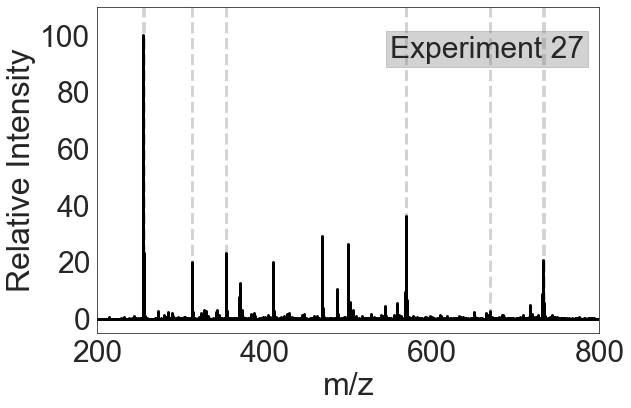

In [31]:
fig,ax = plt.subplots(1,1, figsize=(9,6), sharex=True)

ax.set_xlim(200,800)
ax.set_ylim(-5,110)

ax.set_xlabel('m/z', fontsize=32)
ax.set_ylabel('Relative Intensity', fontsize=32)
#ax.tick_params(axis='both', labelsize=24)
ax.set_xticklabels([200,'',400,'',600,'',800,'',1000], fontsize=30)
ax.set_yticklabels(['',0,20,40,60,80,100], fontsize=30)


#ax.plot(rulib_uv04.data['Wavelength(nm)'], rulib_uv04.data['Absorbance(au)'], color='#45B1ED', linewidth=3)
#ax.plot(pom13.data['Wavelength(nm)'], pom13.data['Absorbance(au)'], color='#0031b2', linewidth=3)
#ax.plot(pom11.data['Wavelength(nm)'], pom11.data['Absorbance(au)'], color='#0b4fff', linewidth=3)
#ax.plot(pom09.data['Wavelength(nm)'], pom09.data['Absorbance(au)'], color='#648fff', linewidth=3)
#ax.plot(pom07.data['Wavelength(nm)'], pom07.data['Absorbance(au)'], color='#a2bcff', linewidth=3)
#ax.plot(pom05.data['Wavelength(nm)'], pom05.data['Absorbance(au)'], color='#c1d2ff', linewidth=3)
#ax.plot(pom00.data['Wavelength(nm)'], pom00.data['Absorbance(au)'], color='#DB9C49', linewidth=3)
#E0E9FF

for mz, val in zip(s127c.data['m/z'],s127c.data['Relative Intensity']):#.iterrows():
    ax.plot([mz,mz], [0,val], 'k', linewidth=3, zorder=2)
ax.plot([200,1050], [0,0], 'k', linewidth=3, zorder=2)

for val in [255,256,313,354,569,669,733,734]:
    ax.plot([val,val], [0,110], 'k', linewidth=3, linestyle='--', color='lightgrey', zorder=1)

#ax.plot([354,354], [0,105], 'k', linewidth=3, linestyle='--', color='#ffb000', zorder=1)
    
ax.annotate('Experiment 27', fontsize=30,
           xy=(550,90), xycoords='data',
           bbox={'facecolor':'grey', 'alpha':0.35, 'edgecolor':'grey'},
           horizontalalignment='left', verticalalignment='bottom')

#ax.plot([761,761],[-0.015,0.35],'k--')

#fig.tight_layout()

fig.savefig('output_vis//interpretation-CCE-5-wkde-MS-mass-spec.png')